<style>body{font-family:Inter,Segoe UI,Roboto,sans-serif;background:#0f172a;color:#e5e7eb}.rendered_html{font-size:16px;line-height:1.7;color:#e5e7eb}.rendered_html h1{font-size:2.4em;font-weight:700;color:#38bdf8;border-bottom:2px solid #1e293b;padding-bottom:.3em}.rendered_html h2{font-size:1.9em;color:#7dd3fc;margin-top:1.4em}.rendered_html h3{font-size:1.4em;color:#bae6fd}.rendered_html a{color:#22d3ee;text-decoration:none}.rendered_html a:hover{text-decoration:underline}.rendered_html blockquote{border-left:4px solid #38bdf8;background:#020617;padding:.6em 1em;color:#cbd5f5;font-style:italic}.rendered_html pre,.output_area pre{background:#020617;border-radius:10px;padding:1em;border:1px solid #1e293b;color:#e5e7eb}.rendered_html code{background:#020617;padding:.2em .4em;border-radius:6px;color:#7dd3fc;font-size:.95em}.rendered_html table{border-collapse:collapse;width:100%;margin:1em 0}.rendered_html th{background:#020617;color:#38bdf8;padding:.6em;border-bottom:2px solid #1e293b}.rendered_html td{padding:.6em;border-bottom:1px solid #1e293b}.rendered_html tr:hover{background:#020617}::-webkit-scrollbar{width:8px}::-webkit-scrollbar-thumb{background:#1e293b;border-radius:8px}::-webkit-scrollbar-track{background:#020617}</style>


<div style='color:white; background-color:#6b9bc3ff; border-color: #6b9bc3ff; '>
    <h2>KIE4004 Assignement</h2>

<div style='color: #6b9bc3ff'>
    <h1>Group members</h1>
</div>

-  Charlilou MAES 24218769

-  Louise CLivio

-  Madeleine 

-   

-   

<div style='color: #6b9bc3ff'>
    <h2>Requierements</h2>
</div>

In [ ]:
#Remove the '#' to execute 
# %pip install -r requirements.txt

<div style='color: #6b9bc3ff'>
    <h2>Task 1</h2>
</div>

<div style='color: #6b9bc3ff'>
    <h3>Construct the IEEE system</h3>
</div>

IEEE 33-Bus System Code

IEEE 33-Bus Radial Distribution System
Base MVA: 100.0 MVA
Base Voltage: 12.66 kV
Number of Buses: 33
Number of Branches: 32
Total Load: 3.715 MW + j2.300 MVAr

BUS DATA
 Bus  Type V (p.u.) Angle (deg) P_Load (MW) Q_Load (MVAr)
   1 Slack   1.0000        0.00      0.0000        0.0000
   2    PQ   1.0000        0.00      0.1000        0.0600
   3    PQ   1.0000        0.00      0.0900        0.0400
   4    PQ   1.0000        0.00      0.1200        0.0800
   5    PQ   1.0000        0.00      0.0600        0.0300
   6    PQ   1.0000        0.00      0.0600        0.0200
   7    PQ   1.0000        0.00      0.2000        0.1000
   8    PQ   1.0000        0.00      0.2000        0.1000
   9    PQ   1.0000        0.00      0.0600        0.0200
  10    PQ   1.0000        0.00      0.0600        0.0200
  11    PQ   1.0000        0.00      0.0450        0.0300
  12    PQ   1.0000        0.00      0.0600        0.0350
  13    PQ   1.0000        0.00      0.0600        0.0350
  14    PQ   1.000

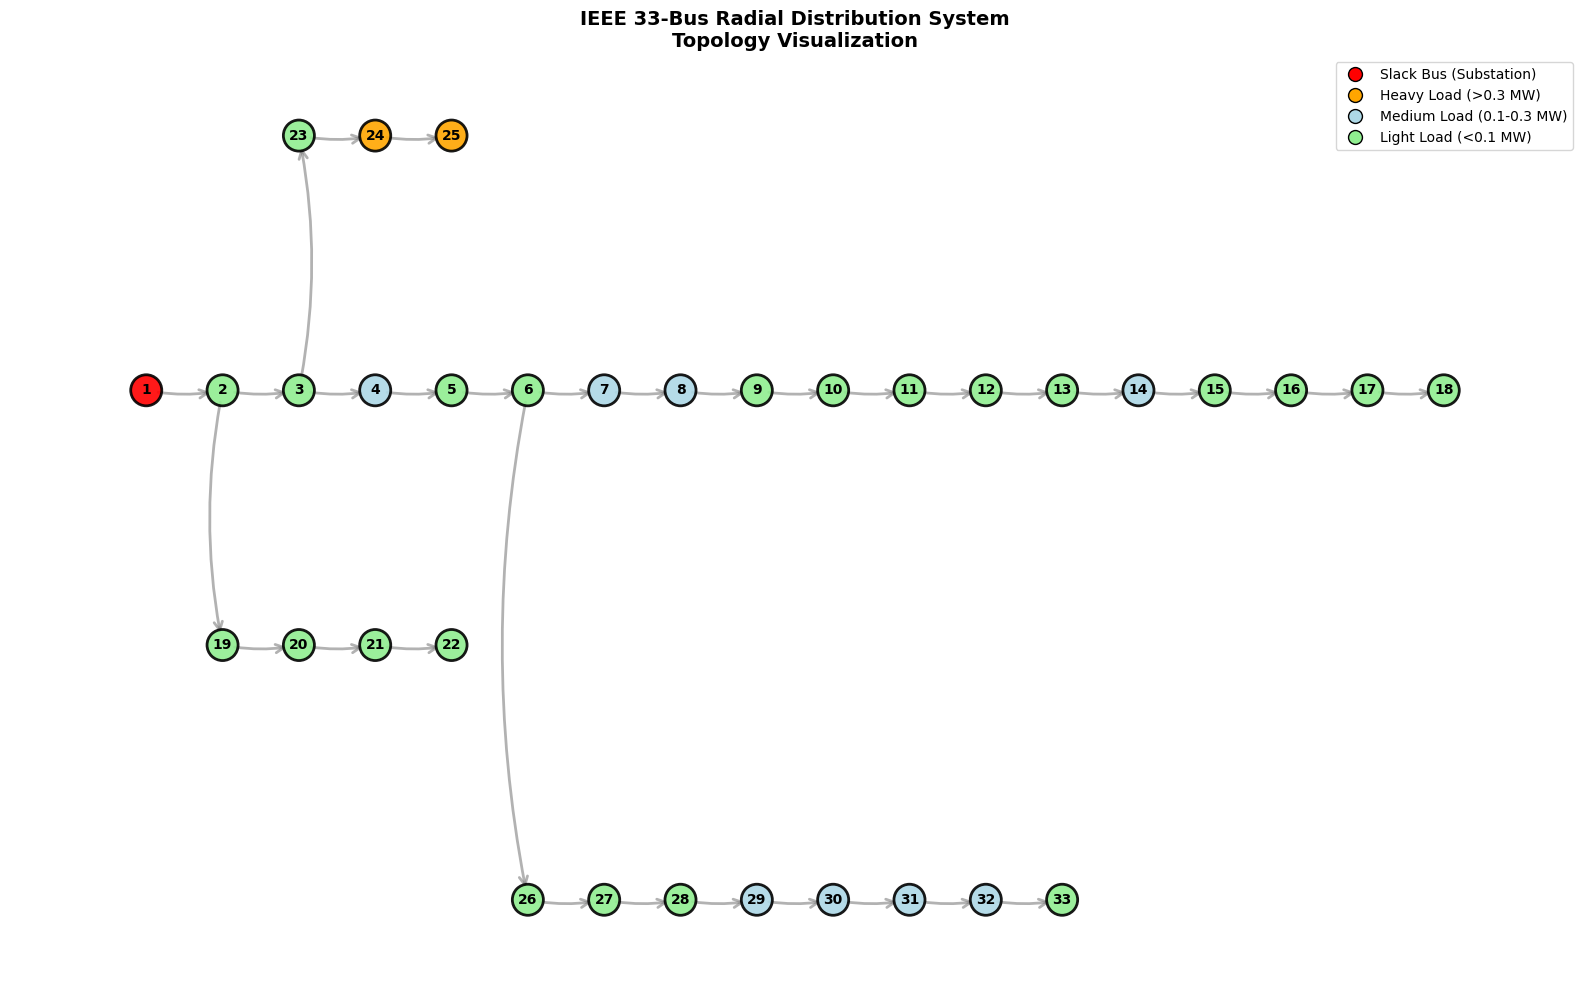

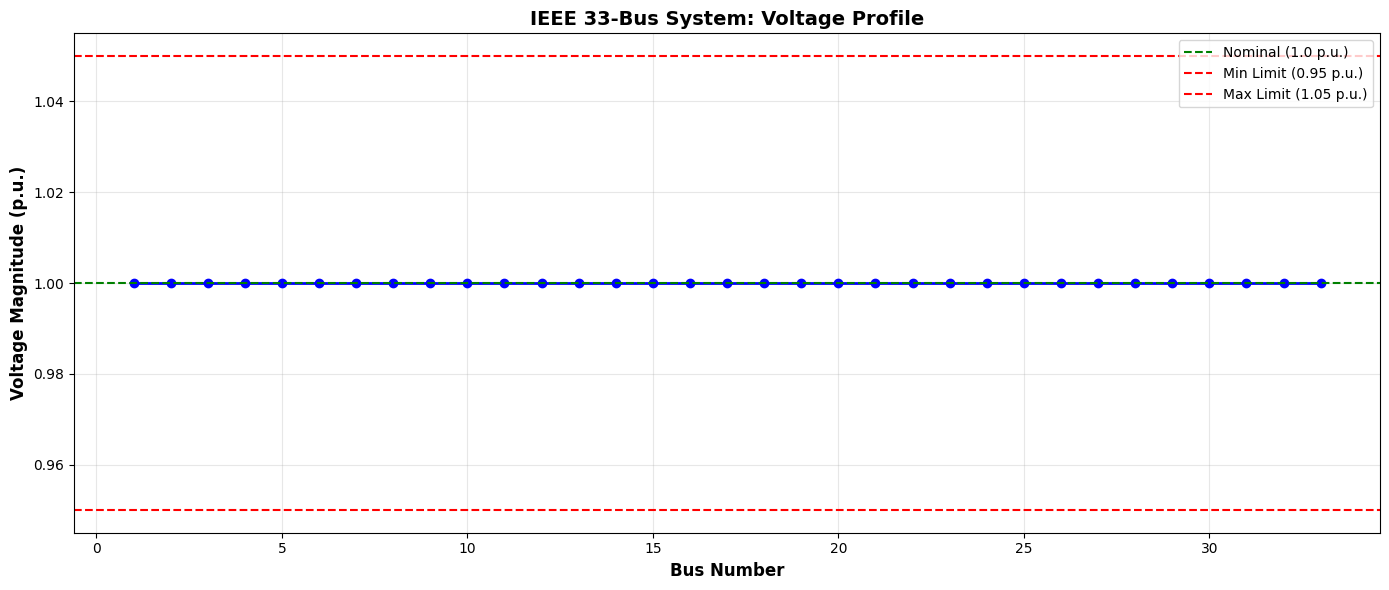

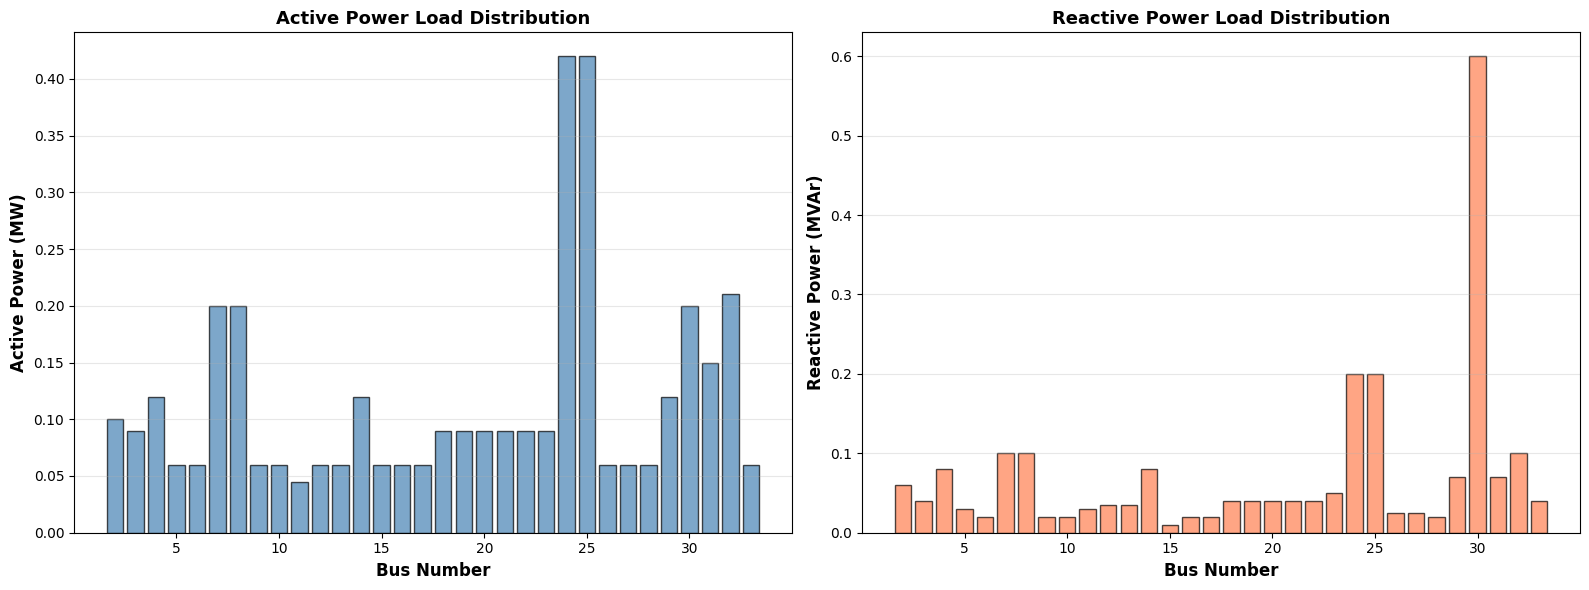

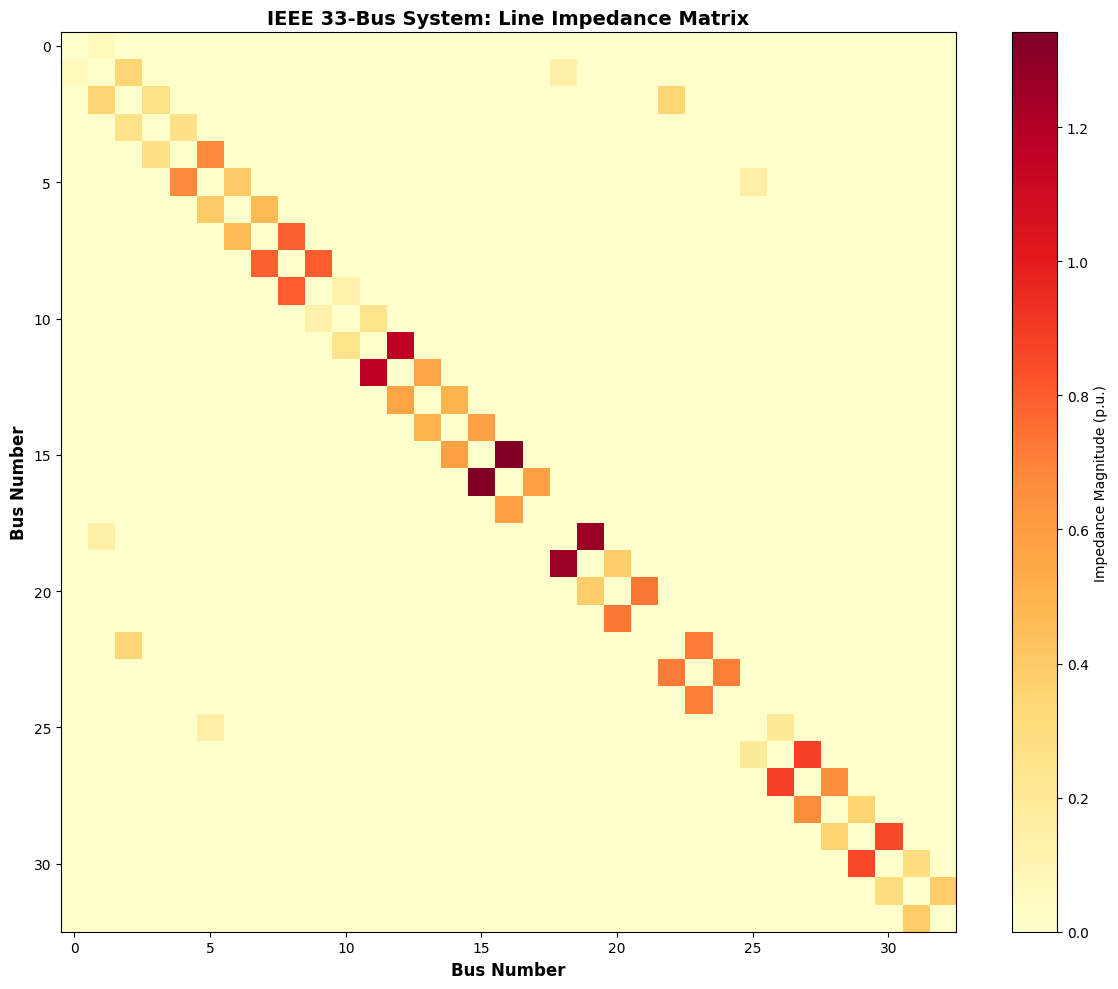

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from dataclasses import dataclass
from typing import List

@dataclass
class Bus:
    """
    Represents a bus in the power system
    
    Attributes:
        number: Bus identification number
        bus_type: 1=Slack/Swing, 2=PV/Generator, 3=PQ/Load
        voltage: Voltage magnitude in per unit (p.u.)
        angle: Voltage angle in radians
        p_load: Active power load in MW
        q_load: Reactive power load in MVAr
    """
    number: int
    bus_type: int
    voltage: float = 1.0
    angle: float = 0.0
    p_load: float = 0.0
    q_load: float = 0.0

@dataclass
class Branch:
    """
    Represents a branch (transmission line) in the power system
    
    Attributes:
        from_bus: Starting bus number
        to_bus: Ending bus number
        resistance: Line resistance in per unit (p.u.)
        reactance: Line reactance in per unit (p.u.)
        susceptance: Line charging susceptance in p.u.
    """
    from_bus: int
    to_bus: int
    resistance: float
    reactance: float
    susceptance: float = 0.0

class IEEE33BusSystem:
    """
    IEEE 33-Bus Radial Distribution System
    
    This is a standard test system used for distribution network studies.
    Base Values:
        - Base MVA: 100 MVA
        - Base Voltage: 12.66 kV
        - Total Load: 3.715 MW + j2.300 MVAr
    """
    
    def __init__(self):
        self.name = "IEEE 33-Bus Radial Distribution System"
        self.base_mva = 100.0  # Base power in MVA
        self.base_kv = 12.66   # Base voltage in kV
        self.buses: List[Bus] = []
        self.branches: List[Branch] = []
        self._build_system()
    
    def _build_system(self):
        """Construct the complete IEEE 33-bus system"""
        self._create_buses()
        self._create_branches()
    
    def _create_buses(self):
        """
        Create all 33 buses with their load data
        
        Load data format: [Bus Number, P_load (kW), Q_load (kVAr)]
        Bus 1 is the slack bus (substation) with no load
        """
        # Bus load data from IEEE 33-bus standard test system
        bus_loads = [
            [1, 0, 0],       # Slack bus (substation)
            [2, 100, 60],
            [3, 90, 40],
            [4, 120, 80],
            [5, 60, 30],
            [6, 60, 20],
            [7, 200, 100],
            [8, 200, 100],
            [9, 60, 20],
            [10, 60, 20],
            [11, 45, 30],
            [12, 60, 35],
            [13, 60, 35],
            [14, 120, 80],
            [15, 60, 10],
            [16, 60, 20],
            [17, 60, 20],
            [18, 90, 40],
            [19, 90, 40],
            [20, 90, 40],
            [21, 90, 40],
            [22, 90, 40],
            [23, 90, 50],
            [24, 420, 200],
            [25, 420, 200],
            [26, 60, 25],
            [27, 60, 25],
            [28, 60, 20],
            [29, 120, 70],
            [30, 200, 600],
            [31, 150, 70],
            [32, 210, 100],
            [33, 60, 40]
        ]
        
        # Create bus objects
        for bus_num, p_kw, q_kvar in bus_loads:
            bus_type = 1 if bus_num == 1 else 3  # 1=Slack, 3=PQ
            self.buses.append(Bus(
                number=bus_num,
                bus_type=bus_type,
                voltage=1.0,  # Initial voltage estimate
                angle=0.0,    # Initial angle estimate
                p_load=p_kw / 1000.0,    # Convert kW to MW
                q_load=q_kvar / 1000.0   # Convert kVAr to MVAr
            ))
    
    def _create_branches(self):
        """
        Create all branches (lines) with their impedance data
        
        Branch data format: [From Bus, To Bus, R (Ω), X (Ω)]
        Impedances are converted to per unit using base values
        """
        # Calculate base impedance: Z_base = (V_base)^2 / S_base
        base_z = (self.base_kv ** 2) / self.base_mva  # in Ohms
        
        # Line data from IEEE 33-bus standard test system
        line_data = [
            [1, 2, 0.0922, 0.0477],
            [2, 3, 0.4930, 0.2511],
            [3, 4, 0.3660, 0.1864],
            [4, 5, 0.3811, 0.1941],
            [5, 6, 0.8190, 0.7070],
            [6, 7, 0.1872, 0.6188],
            [7, 8, 0.7114, 0.2351],
            [8, 9, 1.0300, 0.7400],
            [9, 10, 1.0440, 0.7400],
            [10, 11, 0.1966, 0.0650],
            [11, 12, 0.3744, 0.1238],
            [12, 13, 1.4680, 1.1550],
            [13, 14, 0.5416, 0.7129],
            [14, 15, 0.5910, 0.5260],
            [15, 16, 0.7463, 0.5450],
            [16, 17, 1.2890, 1.7210],
            [17, 18, 0.7320, 0.5740],
            [2, 19, 0.1640, 0.1565],
            [19, 20, 1.5042, 1.3554],
            [20, 21, 0.4095, 0.4784],
            [21, 22, 0.7089, 0.9373],
            [3, 23, 0.4512, 0.3083],
            [23, 24, 0.8980, 0.7091],
            [24, 25, 0.8960, 0.7011],
            [6, 26, 0.2030, 0.1034],
            [26, 27, 0.2842, 0.1447],
            [27, 28, 1.0590, 0.9337],
            [28, 29, 0.8042, 0.7006],
            [29, 30, 0.5075, 0.2585],
            [30, 31, 0.9744, 0.9630],
            [31, 32, 0.3105, 0.3619],
            [32, 33, 0.3410, 0.5302]
        ]
        
        # Create branch objects with per unit impedances
        for from_bus, to_bus, r_ohm, x_ohm in line_data:
            self.branches.append(Branch(
                from_bus=from_bus,
                to_bus=to_bus,
                resistance=r_ohm / base_z,  # Convert to p.u.
                reactance=x_ohm / base_z,   # Convert to p.u.
                susceptance=0.0  # Negligible for distribution systems
            ))
    
    def get_bus_data(self) -> pd.DataFrame:
        """
        Return bus data as a pandas DataFrame
        
        Returns:
            DataFrame with bus information including voltages and loads
        """
        bus_data = []
        for bus in self.buses:
            bus_data.append({
                'Bus': bus.number,
                'Type': 'Slack' if bus.bus_type == 1 else 'PQ',
                'V (p.u.)': f"{bus.voltage:.4f}",
                'Angle (deg)': f"{np.degrees(bus.angle):.2f}",
                'P_Load (MW)': f"{bus.p_load:.4f}",
                'Q_Load (MVAr)': f"{bus.q_load:.4f}"
            })
        return pd.DataFrame(bus_data)
    
    def get_branch_data(self) -> pd.DataFrame:
        """
        Return branch data as a pandas DataFrame
        
        Returns:
            DataFrame with line information including impedances
        """
        branch_data = []
        for branch in self.branches:
            branch_data.append({
                'From Bus': branch.from_bus,
                'To Bus': branch.to_bus,
                'R (p.u.)': f"{branch.resistance:.6f}",
                'X (p.u.)': f"{branch.reactance:.6f}",
                'Z (p.u.)': f"{np.sqrt(branch.resistance**2 + branch.reactance**2):.6f}"
            })
        return pd.DataFrame(branch_data)
    
    def get_ybus_matrix(self) -> np.ndarray:
        """
        Calculate the bus admittance matrix (Y-bus)
        
        The Y-bus matrix is fundamental for power flow analysis
        Y[i,j] represents the admittance between bus i and bus j
        
        Returns:
            Complex numpy array representing the Y-bus matrix
        """
        n_buses = len(self.buses)
        Y = np.zeros((n_buses, n_buses), dtype=complex)
        
        # Build Y-bus from branch data
        for branch in self.branches:
            i = branch.from_bus - 1  # Convert to 0-based indexing
            j = branch.to_bus - 1
            
            # Calculate branch admittance
            z = branch.resistance + 1j * branch.reactance
            y = 1.0 / z if abs(z) > 1e-10 else 0.0
            
            # Fill Y-bus matrix
            # Off-diagonal elements (mutual admittance)
            Y[i, j] -= y
            Y[j, i] -= y
            
            # Diagonal elements (self admittance)
            Y[i, i] += y
            Y[j, j] += y
        
        return Y
    
    def print_system_info(self):
        """Print comprehensive system information"""
        print("="*70)
        print(f"{self.name}")
        print("="*70)
        print(f"Base MVA: {self.base_mva} MVA")
        print(f"Base Voltage: {self.base_kv} kV")
        print(f"Number of Buses: {len(self.buses)}")
        print(f"Number of Branches: {len(self.branches)}")
        
        # Calculate total load
        total_p = sum(bus.p_load for bus in self.buses)
        total_q = sum(bus.q_load for bus in self.buses)
        print(f"Total Load: {total_p:.3f} MW + j{total_q:.3f} MVAr")
        print("="*70)
    
    def plot_topology(self, figsize=(16, 10), show_bus_labels=True, 
                      show_loads=False, node_size=500):
        """
        Visualize the system topology using NetworkX
        
        Args:
            figsize: Figure size (width, height)
            show_bus_labels: Whether to show bus numbers
            show_loads: Whether to display load values on buses
            node_size: Size of bus nodes
        """
        # Create directed graph
        G = nx.DiGraph()
        
        # Add nodes (buses)
        for bus in self.buses:
            G.add_node(bus.number)
        
        # Add edges (branches)
        for branch in self.branches:
            G.add_edge(branch.from_bus, branch.to_bus)
        
        # Create figure
        plt.figure(figsize=figsize)
        
        # Use hierarchical layout for radial system
        pos = nx.spring_layout(G, k=2, iterations=50, seed=42)
        
        # Alternatively, use custom layout for better visualization
        pos = self._custom_layout()
        
        # Color nodes based on type and load
        node_colors = []
        for bus in self.buses:
            if bus.bus_type == 1:  # Slack bus
                node_colors.append('red')
            elif bus.p_load > 0.3:  # Heavy load
                node_colors.append('orange')
            elif bus.p_load > 0.1:  # Medium load
                node_colors.append('lightblue')
            else:  # Light/no load
                node_colors.append('lightgreen')
        
        # Draw network
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, 
                              node_size=node_size, alpha=0.9, 
                              edgecolors='black', linewidths=2)
        
        nx.draw_networkx_edges(G, pos, edge_color='gray', 
                              width=2, alpha=0.6, 
                              arrows=True, arrowsize=15, 
                              arrowstyle='->', connectionstyle='arc3,rad=0.1')
        
        # Draw labels
        if show_bus_labels:
            if show_loads:
                # Show bus number and load
                labels = {}
                for bus in self.buses:
                    if bus.p_load > 0:
                        labels[bus.number] = f"{bus.number}\n{bus.p_load:.2f}MW"
                    else:
                        labels[bus.number] = f"{bus.number}"
                nx.draw_networkx_labels(G, pos, labels, font_size=8, 
                                       font_weight='bold')
            else:
                # Show only bus numbers
                nx.draw_networkx_labels(G, pos, 
                                       {bus.number: str(bus.number) 
                                        for bus in self.buses}, 
                                       font_size=10, font_weight='bold')
        
        # Add legend
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='red', markersize=10, 
                      label='Slack Bus (Substation)', markeredgecolor='black'),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='orange', markersize=10, 
                      label='Heavy Load (>0.3 MW)', markeredgecolor='black'),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='lightblue', markersize=10, 
                      label='Medium Load (0.1-0.3 MW)', markeredgecolor='black'),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='lightgreen', markersize=10, 
                      label='Light Load (<0.1 MW)', markeredgecolor='black')
        ]
        plt.legend(handles=legend_elements, loc='upper right', fontsize=10)
        
        plt.title(f"{self.name}\nTopology Visualization", 
                 fontsize=14, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    
    def _custom_layout(self):
        """
        Create a custom layout for better visualization of radial system
        This arranges buses in a hierarchical manner
        """
        pos = {}
        
        # Main feeder (Bus 1-18)
        for i in range(1, 19):
            pos[i] = (i * 0.5, 5)
        
        # Lateral 1 from Bus 2 (Bus 19-22)
        for i, bus in enumerate([19, 20, 21, 22]):
            pos[bus] = (1 + i * 0.5, 3)
        
        # Lateral 2 from Bus 3 (Bus 23-25)
        for i, bus in enumerate([23, 24, 25]):
            pos[bus] = (1.5 + i * 0.5, 7)
        
        # Lateral 3 from Bus 6 (Bus 26-33)
        for i, bus in enumerate([26, 27, 28, 29, 30, 31, 32, 33]):
            pos[bus] = (3 + i * 0.5, 1)
        
        return pos
    
    def plot_voltage_profile(self, voltages=None):
        """
        Plot voltage profile along the feeder
        
        Args:
            voltages: Array of bus voltages (if None, uses initial values)
        """
        if voltages is None:
            voltages = [bus.voltage for bus in self.buses]
        
        bus_numbers = [bus.number for bus in self.buses]
        
        plt.figure(figsize=(14, 6))
        plt.plot(bus_numbers, voltages, 'b-o', linewidth=2, markersize=6)
        plt.axhline(y=1.0, color='g', linestyle='--', label='Nominal (1.0 p.u.)')
        plt.axhline(y=0.95, color='r', linestyle='--', label='Min Limit (0.95 p.u.)')
        plt.axhline(y=1.05, color='r', linestyle='--', label='Max Limit (1.05 p.u.)')
        
        plt.xlabel('Bus Number', fontsize=12, fontweight='bold')
        plt.ylabel('Voltage Magnitude (p.u.)', fontsize=12, fontweight='bold')
        plt.title('IEEE 33-Bus System: Voltage Profile', 
                 fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=10)
        plt.tight_layout()
        plt.show()
    
    def plot_load_distribution(self):
        """Plot the load distribution across all buses"""
        bus_numbers = [bus.number for bus in self.buses if bus.p_load > 0]
        p_loads = [bus.p_load for bus in self.buses if bus.p_load > 0]
        q_loads = [bus.q_load for bus in self.buses if bus.p_load > 0]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Active power
        ax1.bar(bus_numbers, p_loads, color='steelblue', alpha=0.7, edgecolor='black')
        ax1.set_xlabel('Bus Number', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Active Power (MW)', fontsize=12, fontweight='bold')
        ax1.set_title('Active Power Load Distribution', fontsize=13, fontweight='bold')
        ax1.grid(True, alpha=0.3, axis='y')
        
        # Reactive power
        ax2.bar(bus_numbers, q_loads, color='coral', alpha=0.7, edgecolor='black')
        ax2.set_xlabel('Bus Number', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Reactive Power (MVAr)', fontsize=12, fontweight='bold')
        ax2.set_title('Reactive Power Load Distribution', fontsize=13, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    
    def plot_impedance_heatmap(self):
        """Plot heatmap of line impedances"""
        n = len(self.buses)
        Z_matrix = np.zeros((n, n))
        
        for branch in self.branches:
            i = branch.from_bus - 1
            j = branch.to_bus - 1
            z_mag = np.sqrt(branch.resistance**2 + branch.reactance**2)
            Z_matrix[i, j] = z_mag
            Z_matrix[j, i] = z_mag
        
        plt.figure(figsize=(12, 10))
        plt.imshow(Z_matrix, cmap='YlOrRd', aspect='auto')
        plt.colorbar(label='Impedance Magnitude (p.u.)')
        plt.title('IEEE 33-Bus System: Line Impedance Matrix', 
                 fontsize=14, fontweight='bold')
        plt.xlabel('Bus Number', fontsize=12, fontweight='bold')
        plt.ylabel('Bus Number', fontsize=12, fontweight='bold')
        plt.tight_layout()
        plt.show()


# Example usage
if __name__ == "__main__":
    # Create the IEEE 33-bus system
    system = IEEE33BusSystem()
    
    # Print system information
    system.print_system_info()
    
    print("\n" + "="*70)
    print("BUS DATA")
    print("="*70)
    print(system.get_bus_data().to_string(index=False))
    
    print("\n" + "="*70)
    print("BRANCH DATA (First 10 branches)")
    print("="*70)
    print(system.get_branch_data().head(10).to_string(index=False))
    
    print("\n" + "="*70)
    print("Y-BUS MATRIX (Magnitude - First 5x5)")
    print("="*70)
    Y = system.get_ybus_matrix()
    print(np.abs(Y[:5, :5]))
    
    # Visualizations
    print("\n" + "="*70)
    print("GENERATING VISUALIZATIONS...")
    print("="*70)
    
    # 1. System topology
    system.plot_topology(show_bus_labels=True, show_loads=False)
    
    # 2. Voltage profile (initial/flat start)
    system.plot_voltage_profile()
    
    # 3. Load distribution
    system.plot_load_distribution()

    system.plot_impedance_heatmap()

IEEE 69 BUS SYSTEME

IEEE 69-Bus Radial Distribution System
Base MVA: 100.0 MVA
Base Voltage: 12.66 kV
Number of Buses: 69
Number of Branches: 68
Total Load: 3.802 MW + j2.694 MVAr

BUS DATA (First 15 buses)
 Bus  Type V (p.u.) Angle (deg) P_Load (MW) Q_Load (MVAr)
   1 Slack   1.0000        0.00      0.0000        0.0000
   2    PQ   1.0000        0.00      0.0000        0.0000
   3    PQ   1.0000        0.00      0.0000        0.0000
   4    PQ   1.0000        0.00      0.0000        0.0000
   5    PQ   1.0000        0.00      0.0000        0.0000
   6    PQ   1.0000        0.00      0.0026        0.0022
   7    PQ   1.0000        0.00      0.0404        0.0300
   8    PQ   1.0000        0.00      0.0750        0.0540
   9    PQ   1.0000        0.00      0.0300        0.0220
  10    PQ   1.0000        0.00      0.0280        0.0190
  11    PQ   1.0000        0.00      0.1450        0.1040
  12    PQ   1.0000        0.00      0.1450        0.1040
  13    PQ   1.0000        0.00      0.0080        0.0050
 

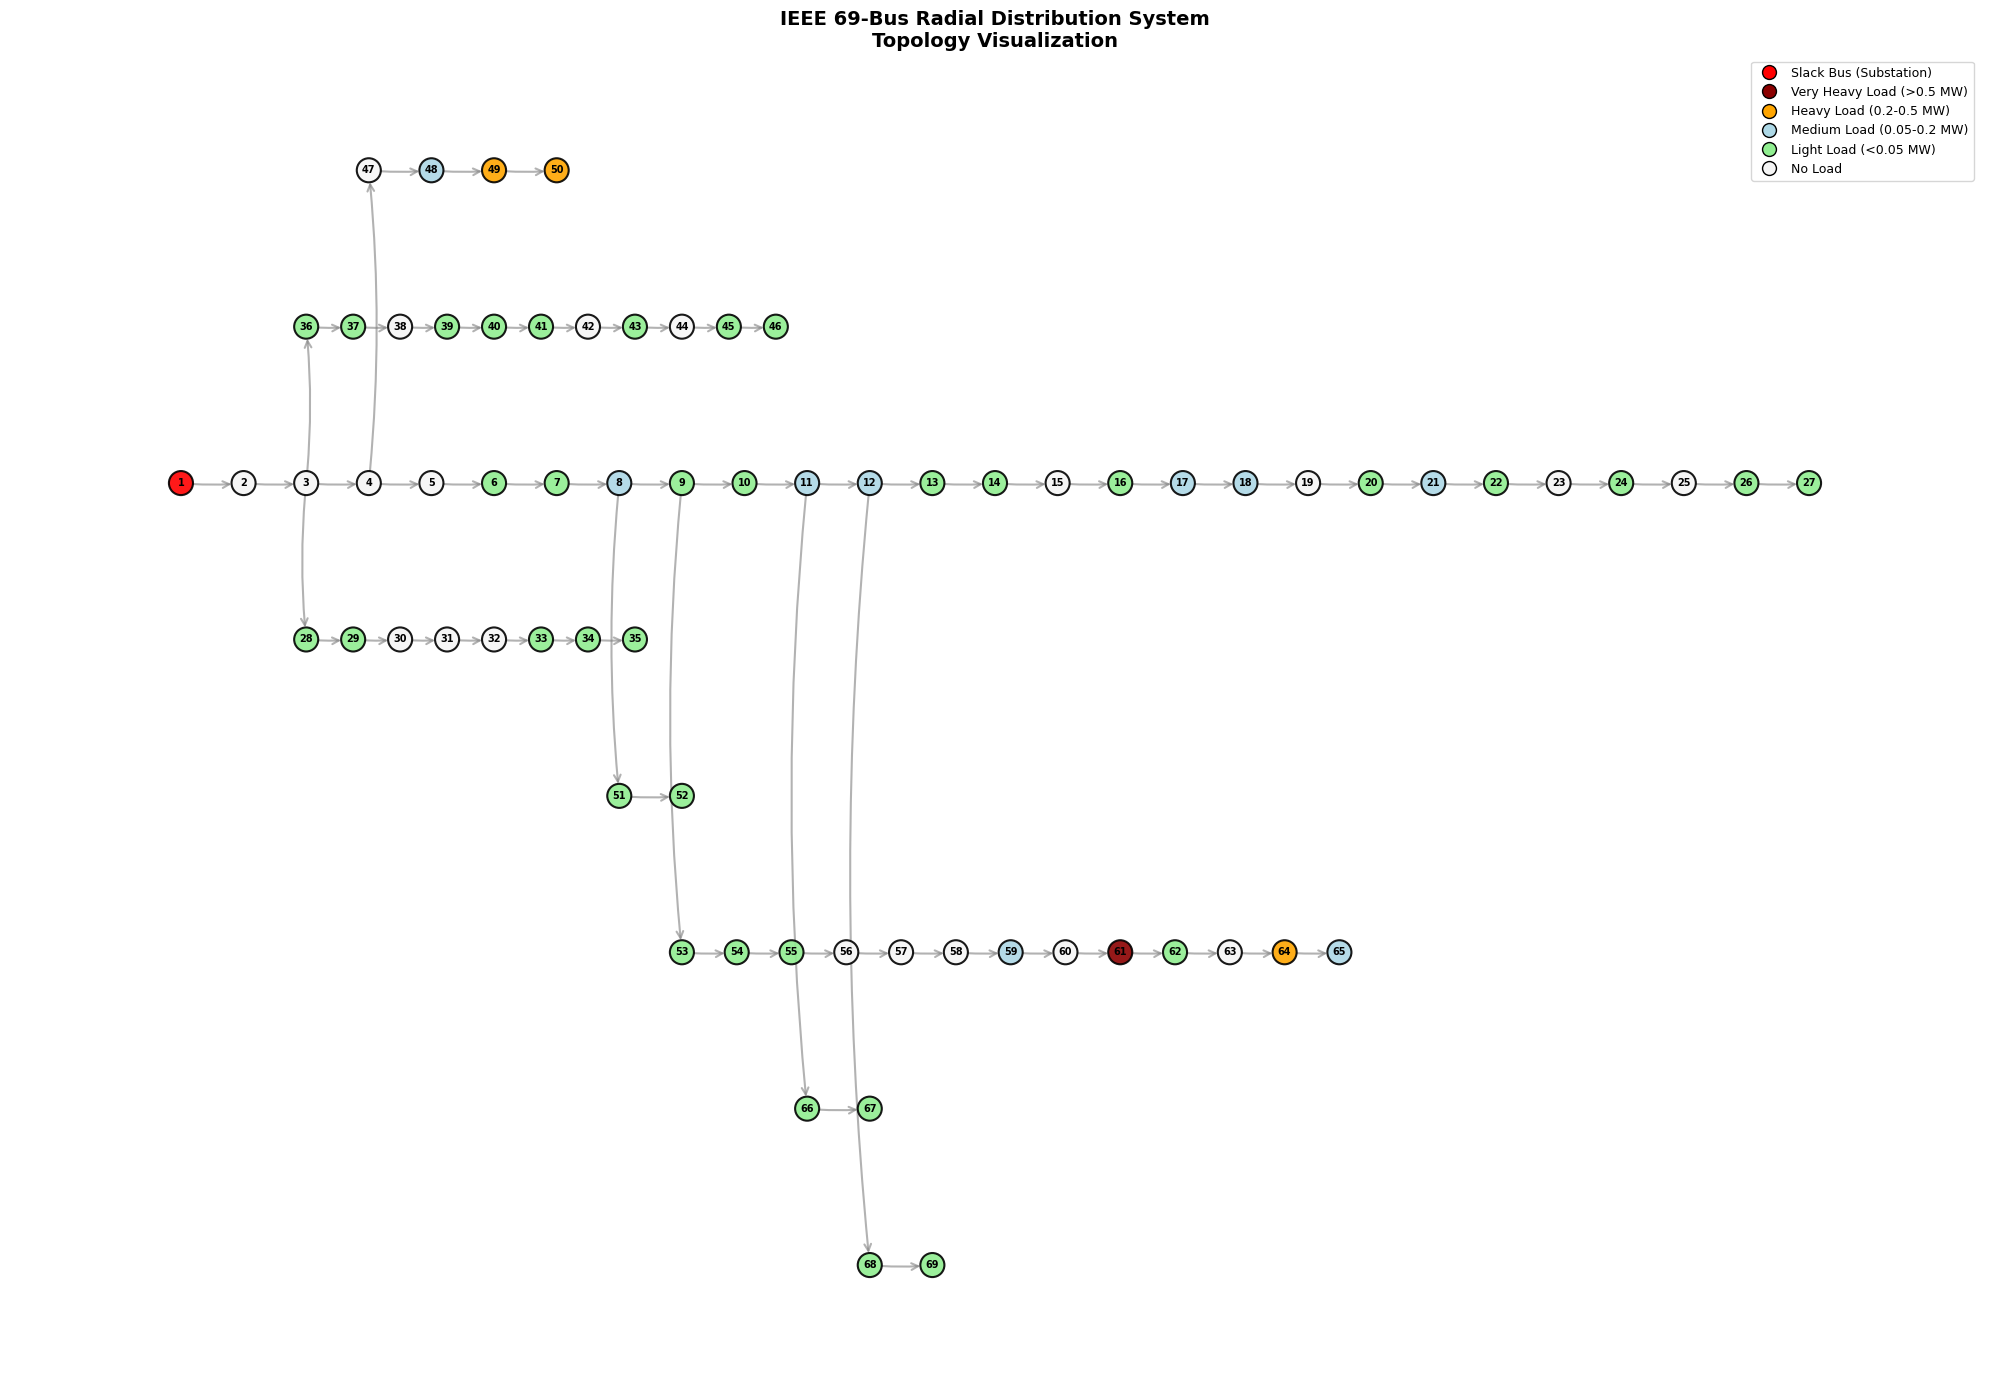

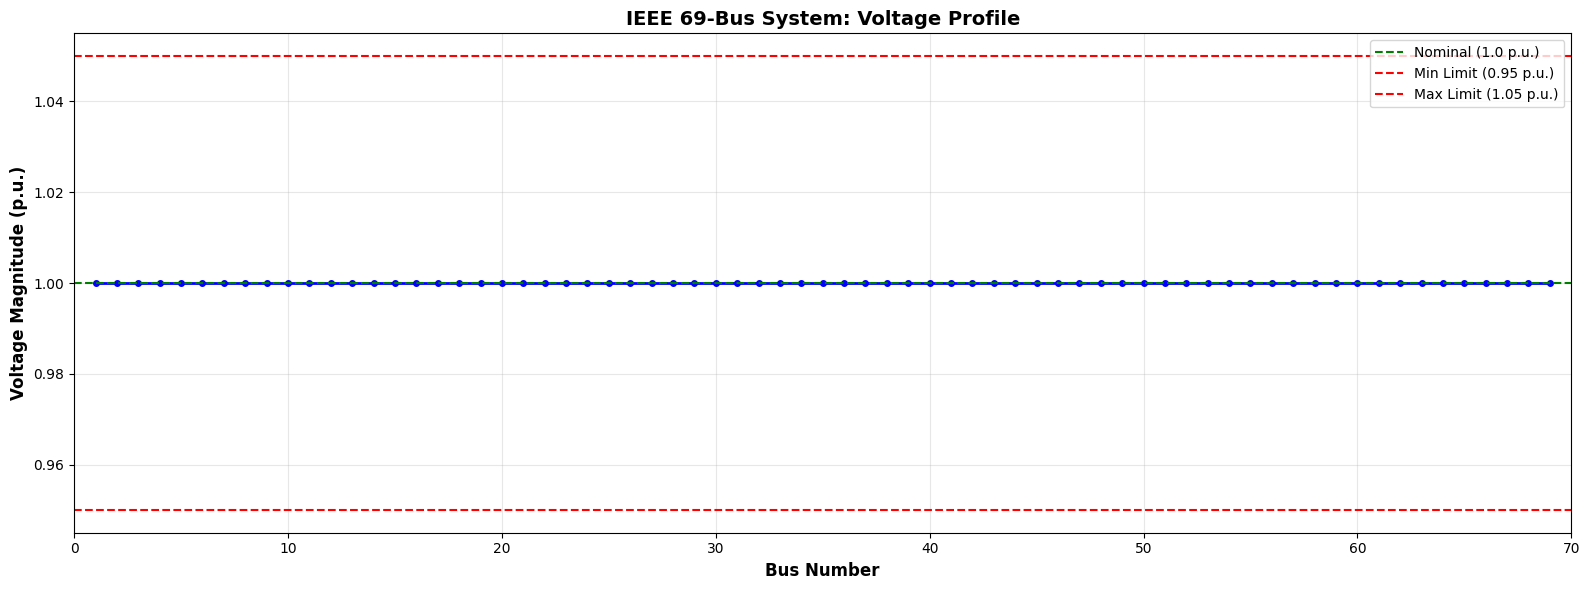

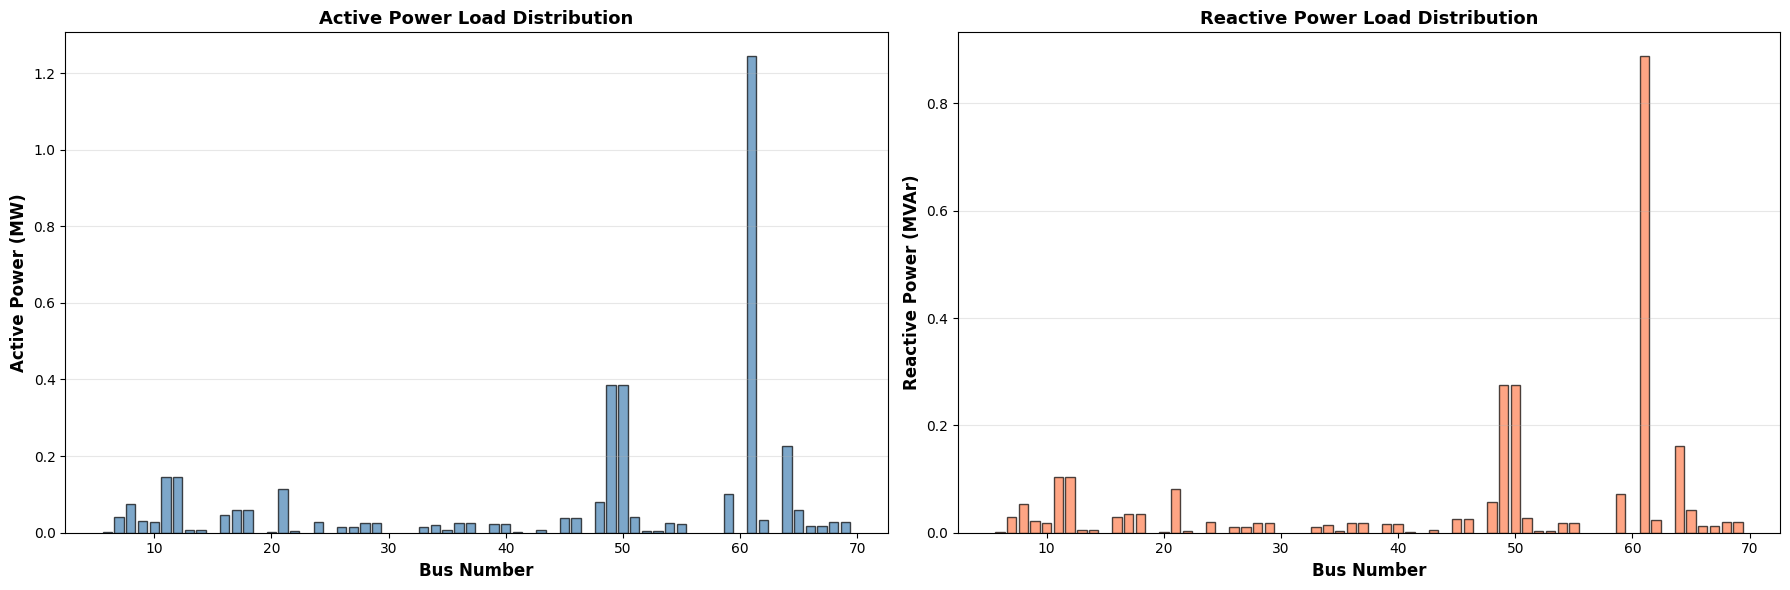

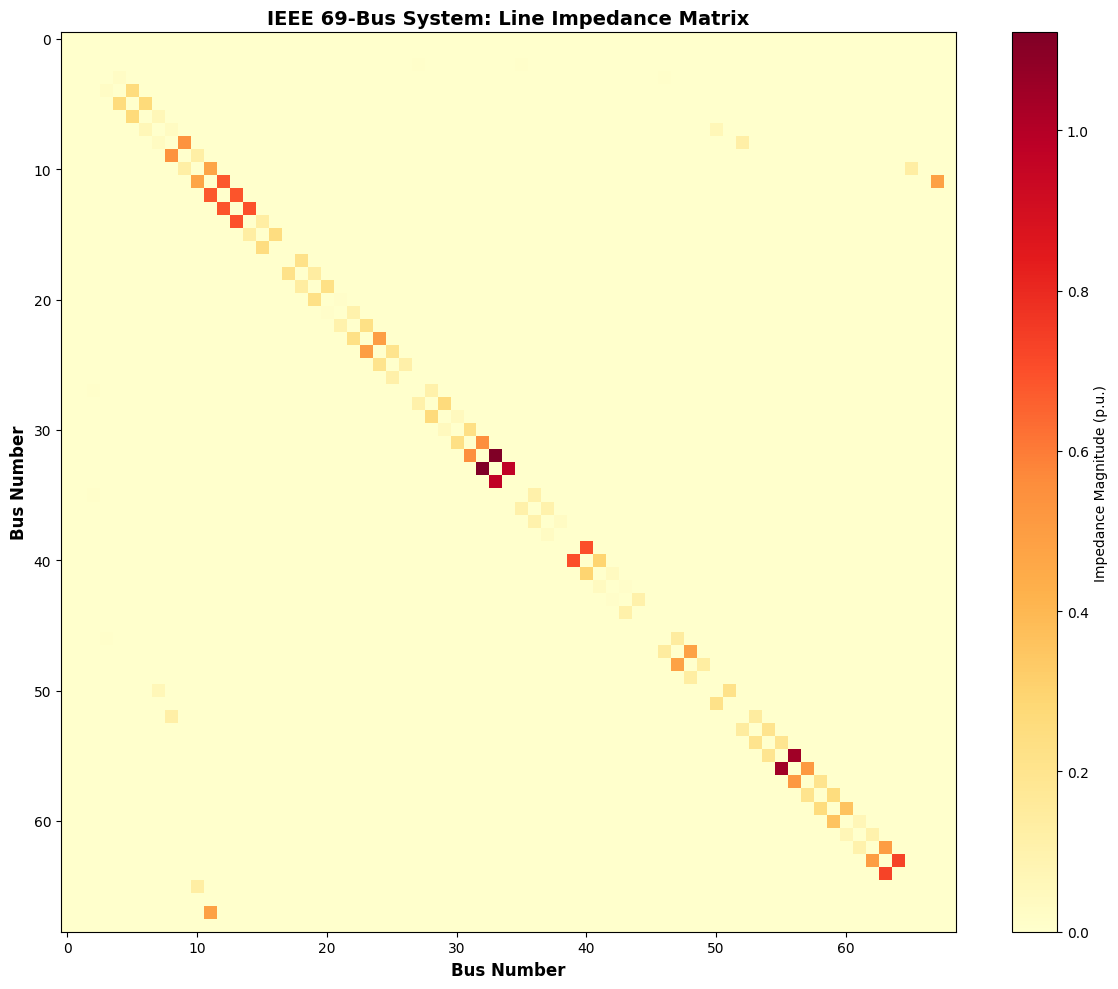

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from dataclasses import dataclass
from typing import List

@dataclass
class Bus:
    """
    Represents a bus in the power system
    
    Attributes:
        number: Bus identification number
        bus_type: 1=Slack/Swing, 2=PV/Generator, 3=PQ/Load
        voltage: Voltage magnitude in per unit (p.u.)
        angle: Voltage angle in radians
        p_load: Active power load in MW
        q_load: Reactive power load in MVAr
    """
    number: int
    bus_type: int
    voltage: float = 1.0
    angle: float = 0.0
    p_load: float = 0.0
    q_load: float = 0.0

@dataclass
class Branch:
    """
    Represents a branch (transmission line) in the power system
    
    Attributes:
        from_bus: Starting bus number
        to_bus: Ending bus number
        resistance: Line resistance in per unit (p.u.)
        reactance: Line reactance in per unit (p.u.)
        susceptance: Line charging susceptance in p.u.
    """
    from_bus: int
    to_bus: int
    resistance: float
    reactance: float
    susceptance: float = 0.0

class IEEE69BusSystem:
    """
    IEEE 69-Bus Radial Distribution System
    
    This is a standard test system used for distribution network studies.
    Base Values:
        - Base MVA: 100 MVA
        - Base Voltage: 12.66 kV
        - Total Load: 3.802 MW + j2.694 MVAr
    """
    
    def __init__(self):
        self.name = "IEEE 69-Bus Radial Distribution System"
        self.base_mva = 100.0  # Base power in MVA
        self.base_kv = 12.66   # Base voltage in kV
        self.buses: List[Bus] = []
        self.branches: List[Branch] = []
        self._build_system()
    
    def _build_system(self):
        """Construct the complete IEEE 69-bus system"""
        self._create_buses()
        self._create_branches()
    
    def _create_buses(self):
        """
        Create all 69 buses with their load data
        
        Load data format: [Bus Number, P_load (kW), Q_load (kVAr)]
        Bus 1 is the slack bus (substation) with no load
        """
        # Bus load data from IEEE 69-bus standard test system
        bus_loads = [
            [1, 0, 0],          # Slack bus (substation)
            [2, 0, 0],
            [3, 0, 0],
            [4, 0, 0],
            [5, 0, 0],
            [6, 2.6, 2.2],
            [7, 40.4, 30],
            [8, 75, 54],
            [9, 30, 22],
            [10, 28, 19],
            [11, 145, 104],
            [12, 145, 104],
            [13, 8, 5],
            [14, 8, 5.5],
            [15, 0, 0],
            [16, 45.5, 30],
            [17, 60, 35],
            [18, 60, 35],
            [19, 0, 0],
            [20, 1, 0.6],
            [21, 114, 81],
            [22, 5, 3.5],
            [23, 0, 0],
            [24, 28, 20],
            [25, 0, 0],
            [26, 14, 10],
            [27, 14, 10],
            [28, 26, 18.6],
            [29, 26, 18.6],
            [30, 0, 0],
            [31, 0, 0],
            [32, 0, 0],
            [33, 14, 10],
            [34, 19.5, 14],
            [35, 6, 4],
            [36, 26, 18.55],
            [37, 26, 18.55],
            [38, 0, 0],
            [39, 24, 17],
            [40, 24, 17],
            [41, 1.2, 1],
            [42, 0, 0],
            [43, 6, 4.3],
            [44, 0, 0],
            [45, 39.22, 26.3],
            [46, 39.22, 26.3],
            [47, 0, 0],
            [48, 79, 56.4],
            [49, 384.7, 274.5],
            [50, 384.7, 274.5],
            [51, 40.5, 28.3],
            [52, 3.6, 2.7],
            [53, 4.35, 3.5],
            [54, 26.4, 19],
            [55, 24, 17.2],
            [56, 0, 0],
            [57, 0, 0],
            [58, 0, 0],
            [59, 100, 72],
            [60, 0, 0],
            [61, 1244, 888],
            [62, 32, 23],
            [63, 0, 0],
            [64, 227, 162],
            [65, 59, 42],
            [66, 18, 13],
            [67, 18, 13],
            [68, 28, 20],
            [69, 28, 20]
        ]
        
        # Create bus objects
        for bus_num, p_kw, q_kvar in bus_loads:
            bus_type = 1 if bus_num == 1 else 3  # 1=Slack, 3=PQ
            self.buses.append(Bus(
                number=bus_num,
                bus_type=bus_type,
                voltage=1.0,  # Initial voltage estimate
                angle=0.0,    # Initial angle estimate
                p_load=p_kw / 1000.0,    # Convert kW to MW
                q_load=q_kvar / 1000.0   # Convert kVAr to MVAr
            ))
    
    def _create_branches(self):
        """
        Create all branches (lines) with their impedance data
        
        Branch data format: [From Bus, To Bus, R (Ω), X (Ω)]
        Impedances are converted to per unit using base values
        """
        # Calculate base impedance: Z_base = (V_base)^2 / S_base
        base_z = (self.base_kv ** 2) / self.base_mva  # in Ohms
        
        # Line data from IEEE 69-bus standard test system
        line_data = [
            [1, 2, 0.0005, 0.0012],
            [2, 3, 0.0005, 0.0012],
            [3, 4, 0.0015, 0.0036],
            [4, 5, 0.0251, 0.0294],
            [5, 6, 0.366, 0.1864],
            [6, 7, 0.3811, 0.1941],
            [7, 8, 0.0922, 0.047],
            [8, 9, 0.0493, 0.0251],
            [9, 10, 0.819, 0.2707],
            [10, 11, 0.1872, 0.0619],
            [11, 12, 0.7114, 0.2351],
            [12, 13, 1.03, 0.34],
            [13, 14, 1.044, 0.345],
            [14, 15, 1.058, 0.3496],
            [15, 16, 0.1966, 0.065],
            [16, 17, 0.3744, 0.1238],
            [17, 18, 0.0047, 0.0016],
            [18, 19, 0.3276, 0.1083],
            [19, 20, 0.2106, 0.069],
            [20, 21, 0.3416, 0.1129],
            [21, 22, 0.014, 0.0046],
            [22, 23, 0.1591, 0.0526],
            [23, 24, 0.3463, 0.1145],
            [24, 25, 0.7488, 0.2475],
            [25, 26, 0.3089, 0.1021],
            [26, 27, 0.1732, 0.0572],
            [3, 28, 0.0044, 0.0108],
            [28, 29, 0.064, 0.1565],
            [29, 30, 0.3978, 0.1315],
            [30, 31, 0.0702, 0.0232],
            [31, 32, 0.351, 0.116],
            [32, 33, 0.839, 0.2816],
            [33, 34, 1.708, 0.5646],
            [34, 35, 1.474, 0.4873],
            [3, 36, 0.0044, 0.0108],
            [36, 37, 0.064, 0.1565],
            [37, 38, 0.1053, 0.123],
            [38, 39, 0.0304, 0.0355],
            [39, 40, 0.0018, 0.0021],
            [40, 41, 0.7283, 0.8509],
            [41, 42, 0.31, 0.3623],
            [42, 43, 0.041, 0.0478],
            [43, 44, 0.0092, 0.0116],
            [44, 45, 0.1089, 0.1373],
            [45, 46, 0.0009, 0.0012],
            [4, 47, 0.0034, 0.0084],
            [47, 48, 0.0851, 0.2083],
            [48, 49, 0.2898, 0.7091],
            [49, 50, 0.0822, 0.2011],
            [8, 51, 0.0928, 0.0473],
            [51, 52, 0.3319, 0.1114],
            [9, 53, 0.174, 0.0886],
            [53, 54, 0.203, 0.1034],
            [54, 55, 0.2842, 0.1447],
            [55, 56, 0.2813, 0.1433],
            [56, 57, 1.59, 0.5337],
            [57, 58, 0.7837, 0.263],
            [58, 59, 0.3042, 0.1006],
            [59, 60, 0.3861, 0.1172],
            [60, 61, 0.5075, 0.2585],
            [61, 62, 0.0974, 0.0496],
            [62, 63, 0.145, 0.0738],
            [63, 64, 0.7105, 0.3619],
            [64, 65, 1.041, 0.5302],
            [11, 66, 0.2012, 0.0611],
            [66, 67, 0.0047, 0.0014],
            [12, 68, 0.7394, 0.2444],
            [68, 69, 0.0047, 0.0016]
        ]
        
        # Create branch objects with per unit impedances
        for from_bus, to_bus, r_ohm, x_ohm in line_data:
            self.branches.append(Branch(
                from_bus=from_bus,
                to_bus=to_bus,
                resistance=r_ohm / base_z,  # Convert to p.u.
                reactance=x_ohm / base_z,   # Convert to p.u.
                susceptance=0.0  # Negligible for distribution systems
            ))
    
    def get_bus_data(self) -> pd.DataFrame:
        """
        Return bus data as a pandas DataFrame
        
        Returns:
            DataFrame with bus information including voltages and loads
        """
        bus_data = []
        for bus in self.buses:
            bus_data.append({
                'Bus': bus.number,
                'Type': 'Slack' if bus.bus_type == 1 else 'PQ',
                'V (p.u.)': f"{bus.voltage:.4f}",
                'Angle (deg)': f"{np.degrees(bus.angle):.2f}",
                'P_Load (MW)': f"{bus.p_load:.4f}",
                'Q_Load (MVAr)': f"{bus.q_load:.4f}"
            })
        return pd.DataFrame(bus_data)
    
    def get_branch_data(self) -> pd.DataFrame:
        """
        Return branch data as a pandas DataFrame
        
        Returns:
            DataFrame with line information including impedances
        """
        branch_data = []
        for branch in self.branches:
            branch_data.append({
                'From Bus': branch.from_bus,
                'To Bus': branch.to_bus,
                'R (p.u.)': f"{branch.resistance:.6f}",
                'X (p.u.)': f"{branch.reactance:.6f}",
                'Z (p.u.)': f"{np.sqrt(branch.resistance**2 + branch.reactance**2):.6f}"
            })
        return pd.DataFrame(branch_data)
    
    def get_ybus_matrix(self) -> np.ndarray:
        """
        Calculate the bus admittance matrix (Y-bus)
        
        The Y-bus matrix is fundamental for power flow analysis
        Y[i,j] represents the admittance between bus i and bus j
        
        Returns:
            Complex numpy array representing the Y-bus matrix
        """
        n_buses = len(self.buses)
        Y = np.zeros((n_buses, n_buses), dtype=complex)
        
        # Build Y-bus from branch data
        for branch in self.branches:
            i = branch.from_bus - 1  # Convert to 0-based indexing
            j = branch.to_bus - 1
            
            # Calculate branch admittance
            z = branch.resistance + 1j * branch.reactance
            y = 1.0 / z if abs(z) > 1e-10 else 0.0
            
            # Fill Y-bus matrix
            # Off-diagonal elements (mutual admittance)
            Y[i, j] -= y
            Y[j, i] -= y
            
            # Diagonal elements (self admittance)
            Y[i, i] += y
            Y[j, j] += y
        
        return Y
    
    def print_system_info(self):
        """Print comprehensive system information"""
        print("="*70)
        print(f"{self.name}")
        print("="*70)
        print(f"Base MVA: {self.base_mva} MVA")
        print(f"Base Voltage: {self.base_kv} kV")
        print(f"Number of Buses: {len(self.buses)}")
        print(f"Number of Branches: {len(self.branches)}")
        
        # Calculate total load
        total_p = sum(bus.p_load for bus in self.buses)
        total_q = sum(bus.q_load for bus in self.buses)
        print(f"Total Load: {total_p:.3f} MW + j{total_q:.3f} MVAr")
        print("="*70)
    
    def plot_topology(self, figsize=(20, 14), show_bus_labels=True, 
                      show_loads=False, node_size=300):
        """
        Visualize the system topology using NetworkX
        
        Args:
            figsize: Figure size (width, height)
            show_bus_labels: Whether to show bus numbers
            show_loads: Whether to display load values on buses
            node_size: Size of bus nodes
        """
        # Create directed graph
        G = nx.DiGraph()
        
        # Add nodes (buses)
        for bus in self.buses:
            G.add_node(bus.number)
        
        # Add edges (branches)
        for branch in self.branches:
            G.add_edge(branch.from_bus, branch.to_bus)
        
        # Create figure
        plt.figure(figsize=figsize)
        
        # Use custom hierarchical layout for radial system
        pos = self._custom_hierarchical_layout()
        
        # Color nodes based on type and load
        node_colors = []
        for bus in self.buses:
            if bus.bus_type == 1:  # Slack bus
                node_colors.append('red')
            elif bus.p_load > 0.5:  # Very heavy load
                node_colors.append('darkred')
            elif bus.p_load > 0.2:  # Heavy load
                node_colors.append('orange')
            elif bus.p_load > 0.05:  # Medium load
                node_colors.append('lightblue')
            elif bus.p_load > 0:  # Light load
                node_colors.append('lightgreen')
            else:  # No load
                node_colors.append('whitesmoke')
        
        # Draw network
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, 
                              node_size=node_size, alpha=0.9, 
                              edgecolors='black', linewidths=1.5)
        
        nx.draw_networkx_edges(G, pos, edge_color='gray', 
                              width=1.5, alpha=0.6, 
                              arrows=True, arrowsize=12, 
                              arrowstyle='->', connectionstyle='arc3,rad=0.05')
        
        # Draw labels
        if show_bus_labels:
            if show_loads:
                # Show bus number and load
                labels = {}
                for bus in self.buses:
                    if bus.p_load > 0:
                        labels[bus.number] = f"{bus.number}\n{bus.p_load:.2f}MW"
                    else:
                        labels[bus.number] = f"{bus.number}"
                nx.draw_networkx_labels(G, pos, labels, font_size=6, 
                                       font_weight='bold')
            else:
                # Show only bus numbers
                nx.draw_networkx_labels(G, pos, 
                                       {bus.number: str(bus.number) 
                                        for bus in self.buses}, 
                                       font_size=7, font_weight='bold')
        
        # Add legend
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='red', markersize=10, 
                      label='Slack Bus (Substation)', markeredgecolor='black'),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='darkred', markersize=10, 
                      label='Very Heavy Load (>0.5 MW)', markeredgecolor='black'),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='orange', markersize=10, 
                      label='Heavy Load (0.2-0.5 MW)', markeredgecolor='black'),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='lightblue', markersize=10, 
                      label='Medium Load (0.05-0.2 MW)', markeredgecolor='black'),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='lightgreen', markersize=10, 
                      label='Light Load (<0.05 MW)', markeredgecolor='black'),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='whitesmoke', markersize=10, 
                      label='No Load', markeredgecolor='black')
        ]
        plt.legend(handles=legend_elements, loc='upper right', fontsize=9)
        
        plt.title(f"{self.name}\nTopology Visualization", 
                 fontsize=14, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    
    def plot_voltage_profile(self, voltages=None):
        """
        Plot voltage profile along the feeder
        
        Args:
            voltages: Array of bus voltages (if None, uses initial values)
        """
        if voltages is None:
            voltages = [bus.voltage for bus in self.buses]
        
        bus_numbers = [bus.number for bus in self.buses]
        
        plt.figure(figsize=(16, 6))
        plt.plot(bus_numbers, voltages, 'b-o', linewidth=2, markersize=4)
        plt.axhline(y=1.0, color='g', linestyle='--', label='Nominal (1.0 p.u.)')
        plt.axhline(y=0.95, color='r', linestyle='--', label='Min Limit (0.95 p.u.)')
        plt.axhline(y=1.05, color='r', linestyle='--', label='Max Limit (1.05 p.u.)')
        
        plt.xlabel('Bus Number', fontsize=12, fontweight='bold')
        plt.ylabel('Voltage Magnitude (p.u.)', fontsize=12, fontweight='bold')
        plt.title('IEEE 69-Bus System: Voltage Profile', 
                 fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=10)
        plt.xlim(0, 70)
        plt.tight_layout()
        plt.show()
    
    def plot_load_distribution(self):
        """Plot the load distribution across all buses"""
        bus_numbers = [bus.number for bus in self.buses if bus.p_load > 0]
        p_loads = [bus.p_load for bus in self.buses if bus.p_load > 0]
        q_loads = [bus.q_load for bus in self.buses if bus.p_load > 0]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
        
        # Active power
        ax1.bar(bus_numbers, p_loads, color='steelblue', alpha=0.7, edgecolor='black')
        ax1.set_xlabel('Bus Number', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Active Power (MW)', fontsize=12, fontweight='bold')
        ax1.set_title('Active Power Load Distribution', fontsize=13, fontweight='bold')
        ax1.grid(True, alpha=0.3, axis='y')
        
        # Reactive power
        ax2.bar(bus_numbers, q_loads, color='coral', alpha=0.7, edgecolor='black')
        ax2.set_xlabel('Bus Number', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Reactive Power (MVAr)', fontsize=12, fontweight='bold')
        ax2.set_title('Reactive Power Load Distribution', fontsize=13, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    
    def plot_impedance_heatmap(self):
        """Plot heatmap of line impedances"""
        n = len(self.buses)
        Z_matrix = np.zeros((n, n))
        
        for branch in self.branches:
            i = branch.from_bus - 1
            j = branch.to_bus - 1
            z_mag = np.sqrt(branch.resistance**2 + branch.reactance**2)
            Z_matrix[i, j] = z_mag
            Z_matrix[j, i] = z_mag
        
        plt.figure(figsize=(12, 10))
        plt.imshow(Z_matrix, cmap='YlOrRd', aspect='auto')
        plt.colorbar(label='Impedance Magnitude (p.u.)')
        plt.title('IEEE 69-Bus System: Line Impedance Matrix', 
                 fontsize=14, fontweight='bold')
        plt.xlabel('Bus Number', fontsize=12, fontweight='bold')
        plt.ylabel('Bus Number', fontsize=12, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    def _custom_hierarchical_layout(self):
        """
        Create a custom hierarchical layout for the IEEE 69-bus system
        Arranges buses in a tree-like structure following the radial topology
        """
        pos = {}
        
        # Main feeder from bus 1 to 27
        # Bus 1-27 form the main horizontal backbone
        y_main = 10
        for i in range(1, 28):
            pos[i] = (i * 0.8, y_main)
        
        # Lateral 1: Bus 28-35 (branches from bus 3)
        y_lateral1 = 8
        for i, bus in enumerate([28, 29, 30, 31, 32, 33, 34, 35]):
            pos[bus] = (2.4 + i * 0.6, y_lateral1)
        
        # Lateral 2: Bus 36-46 (branches from bus 3)
        y_lateral2 = 12
        for i, bus in enumerate([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]):
            pos[bus] = (2.4 + i * 0.6, y_lateral2)
        
        # Lateral 3: Bus 47-50 (branches from bus 4)
        y_lateral3 = 14
        for i, bus in enumerate([47, 48, 49, 50]):
            pos[bus] = (3.2 + i * 0.8, y_lateral3)
        
        # Lateral 4: Bus 51-52 (branches from bus 8)
        y_lateral4 = 6
        for i, bus in enumerate([51, 52]):
            pos[bus] = (6.4 + i * 0.8, y_lateral4)
        
        # Lateral 5: Bus 53-65 (branches from bus 9)
        y_lateral5 = 4
        for i, bus in enumerate([53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]):
            pos[bus] = (7.2 + i * 0.7, y_lateral5)
        
        # Lateral 6: Bus 66-67 (branches from bus 11)
        y_lateral6 = 2
        for i, bus in enumerate([66, 67]):
            pos[bus] = (8.8 + i * 0.8, y_lateral6)
        
        # Lateral 7: Bus 68-69 (branches from bus 12)
        y_lateral7 = 0
        for i, bus in enumerate([68, 69]):
            pos[bus] = (9.6 + i * 0.8, y_lateral7)
        
        return pos


# Example usage
if __name__ == "__main__":
    # Create the IEEE 69-bus system
    system = IEEE69BusSystem()
    
    # Print system information
    system.print_system_info()
    
    print("\n" + "="*70)
    print("BUS DATA (First 15 buses)")
    print("="*70)
    print(system.get_bus_data().head(15).to_string(index=False))
    
    print("\n" + "="*70)
    print("BRANCH DATA (First 15 branches)")
    print("="*70)
    print(system.get_branch_data().head(15).to_string(index=False))
    
    print("\n" + "="*70)
    print("Y-BUS MATRIX (Magnitude - First 5x5)")
    print("="*70)
    Y = system.get_ybus_matrix()
    print(np.abs(Y[:5, :5]))
    
    # Visualizations
    print("\n" + "="*70)
    print("GENERATING VISUALIZATIONS...")
    print("="*70)
    
    # 1. System topology
    system.plot_topology(show_bus_labels=True, show_loads=False)
    
    # 2. Voltage profile (initial/flat start)
    system.plot_voltage_profile()
    
    # 3. Load distribution
    system.plot_load_distribution()
    
    # 4. Impedance heatmap
    system.plot_impedance_heatmap()

IEEE 118 BUS SYSTEME

IEEE 118-Bus Transmission System
Base MVA: 100.0 MVA
Number of Buses: 118
Number of Branches: 186
Slack Buses: 1, PV Buses: 52, PQ Buses: 65
Total Generation: 4377.40 MW
Total Load: 4183.00 MW + j1438.00 MVAr

BUS DATA (First 20 buses)
 Bus Type V (p.u.) Angle (deg) P_Gen (MW) Q_Gen (MVAr) P_Load (MW) Q_Load (MVAr)
   1   PQ   0.9550        0.00       0.00         0.00       51.00         27.00
   2   PQ   0.9710        0.00       0.00         0.00       20.00          9.00
   3   PQ   0.9680        0.00       0.00         0.00       39.00         10.00
   4   PV   0.9980        0.00       0.00         0.00       39.00         12.00
   5   PQ   1.0020        0.00       0.00         0.00        0.00          0.00
   6   PV   0.9900        0.00       0.00         0.00       52.00         22.00
   7   PQ   0.9890        0.00       0.00         0.00       19.00          2.00
   8   PV   1.0150        0.00       0.00         0.00       28.00          0.00
   9   PQ   1.0430        0.00     

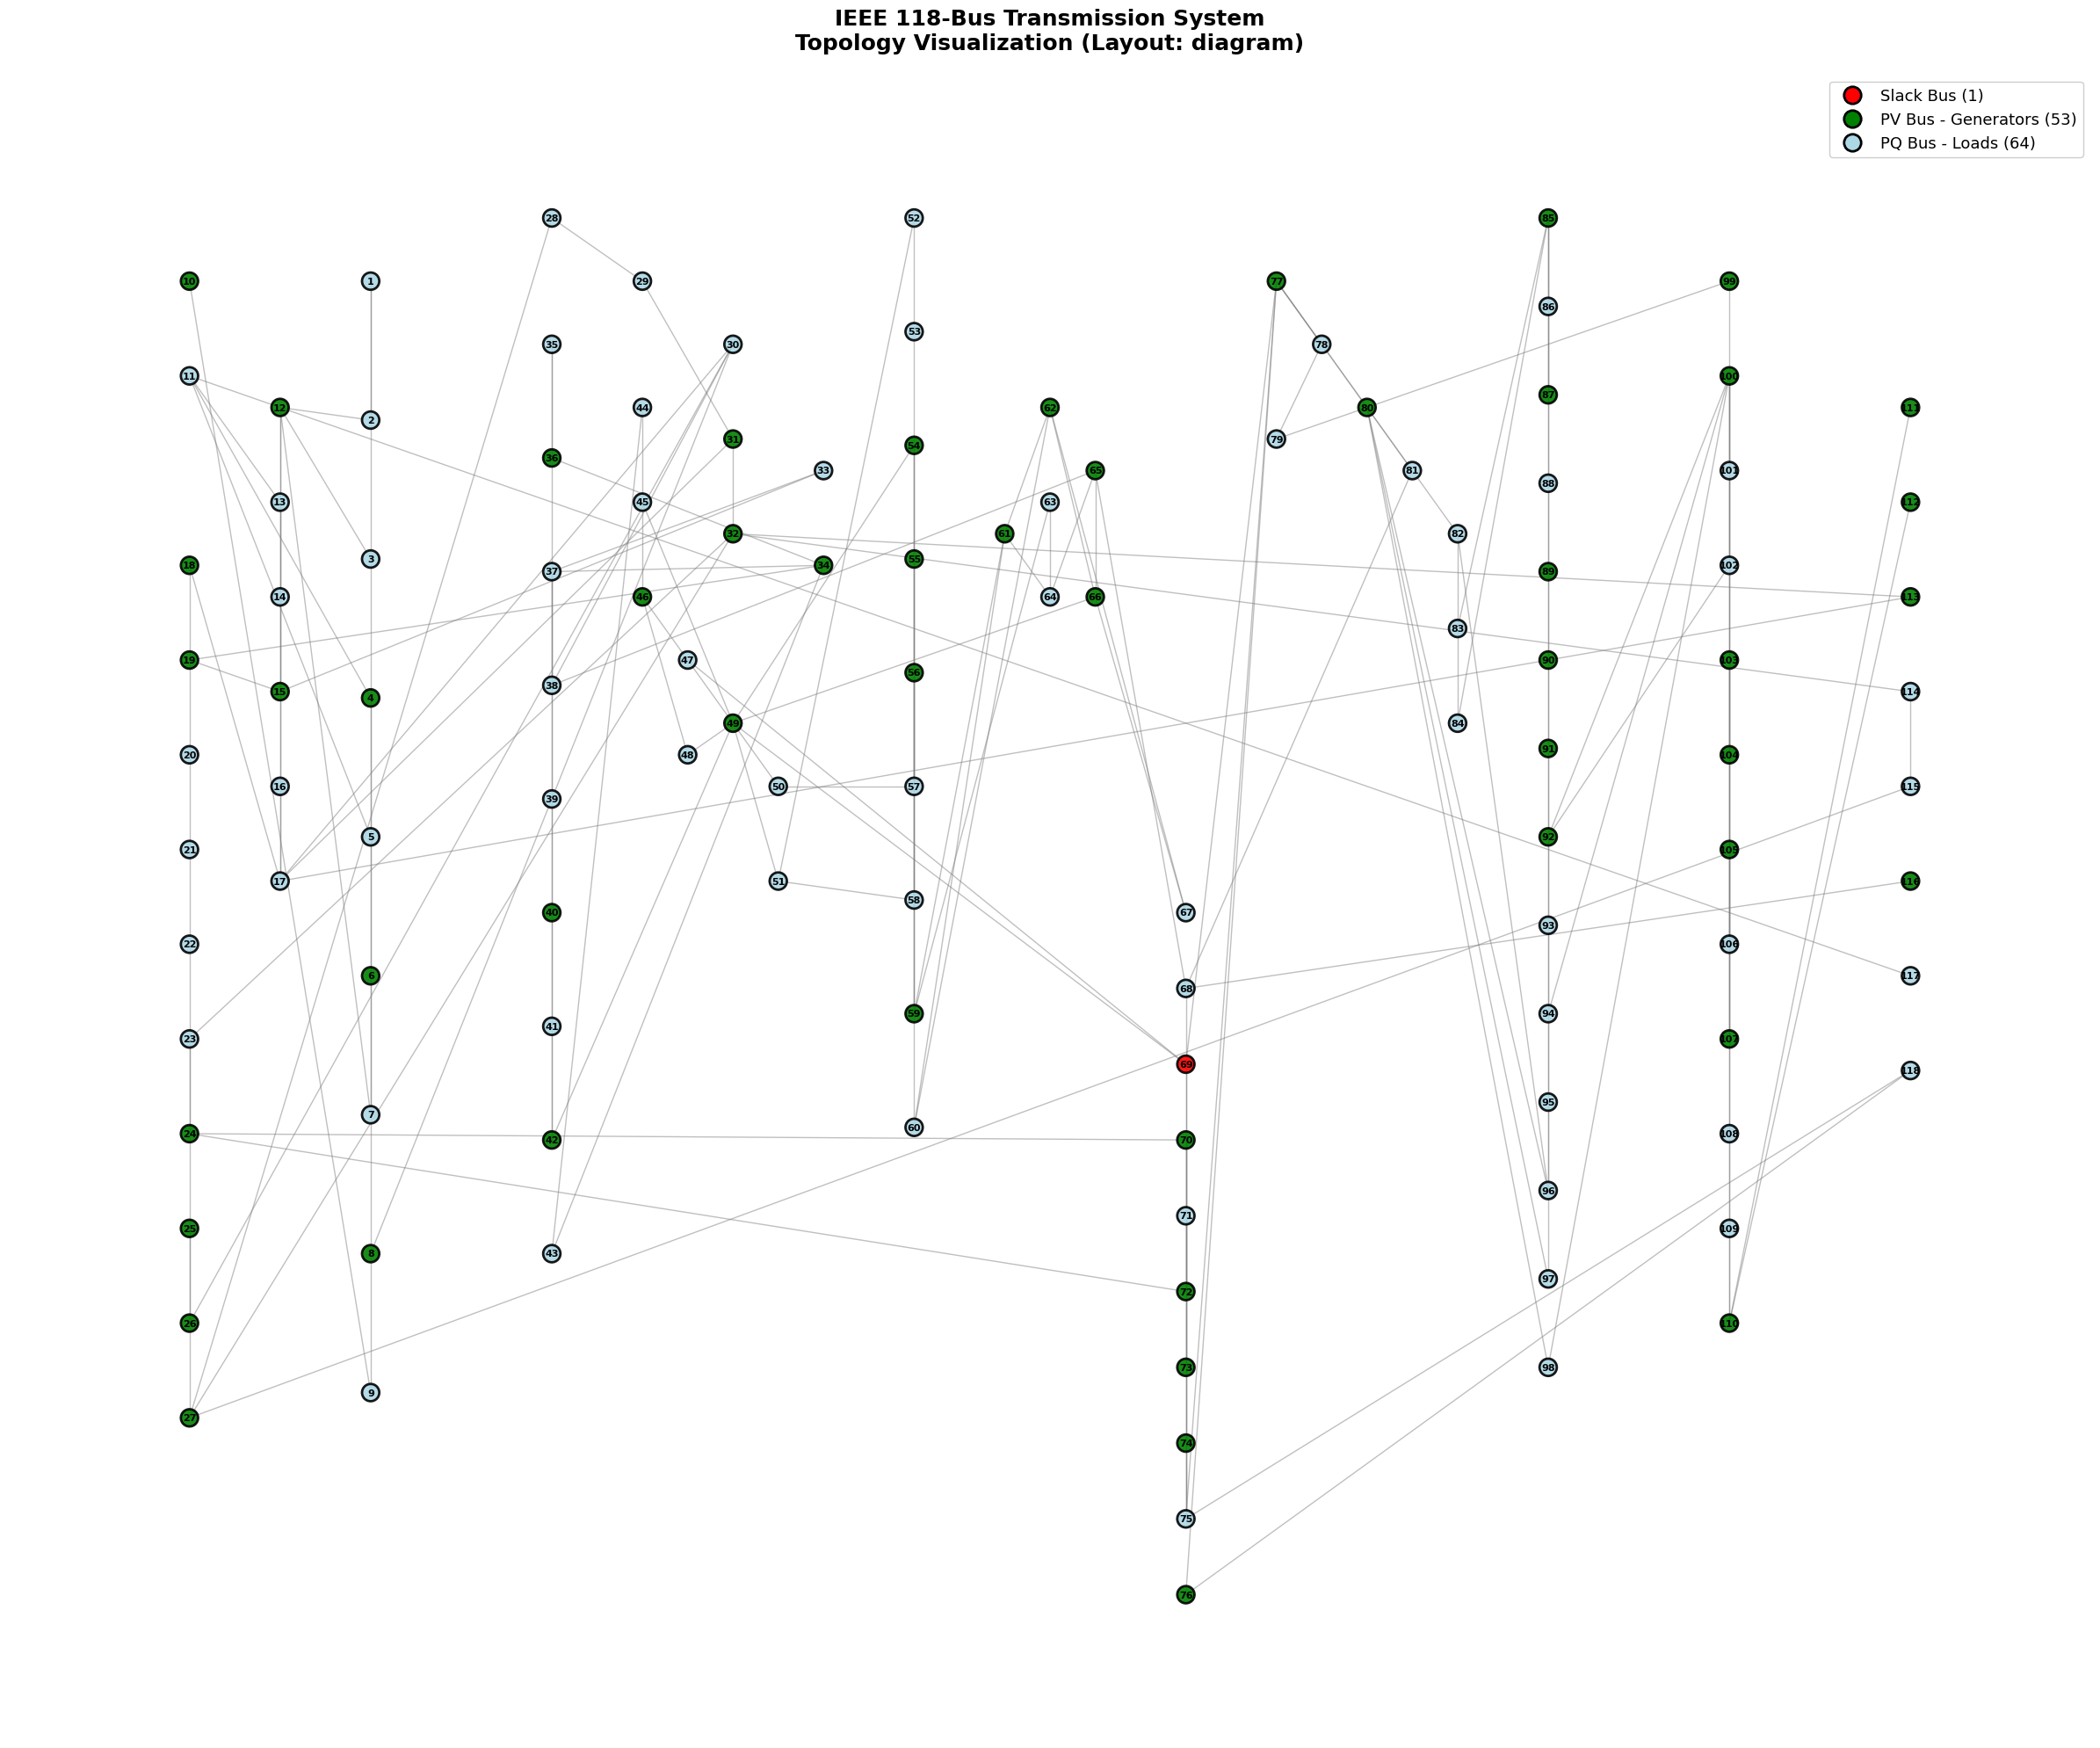


Trying 'shell' layout...


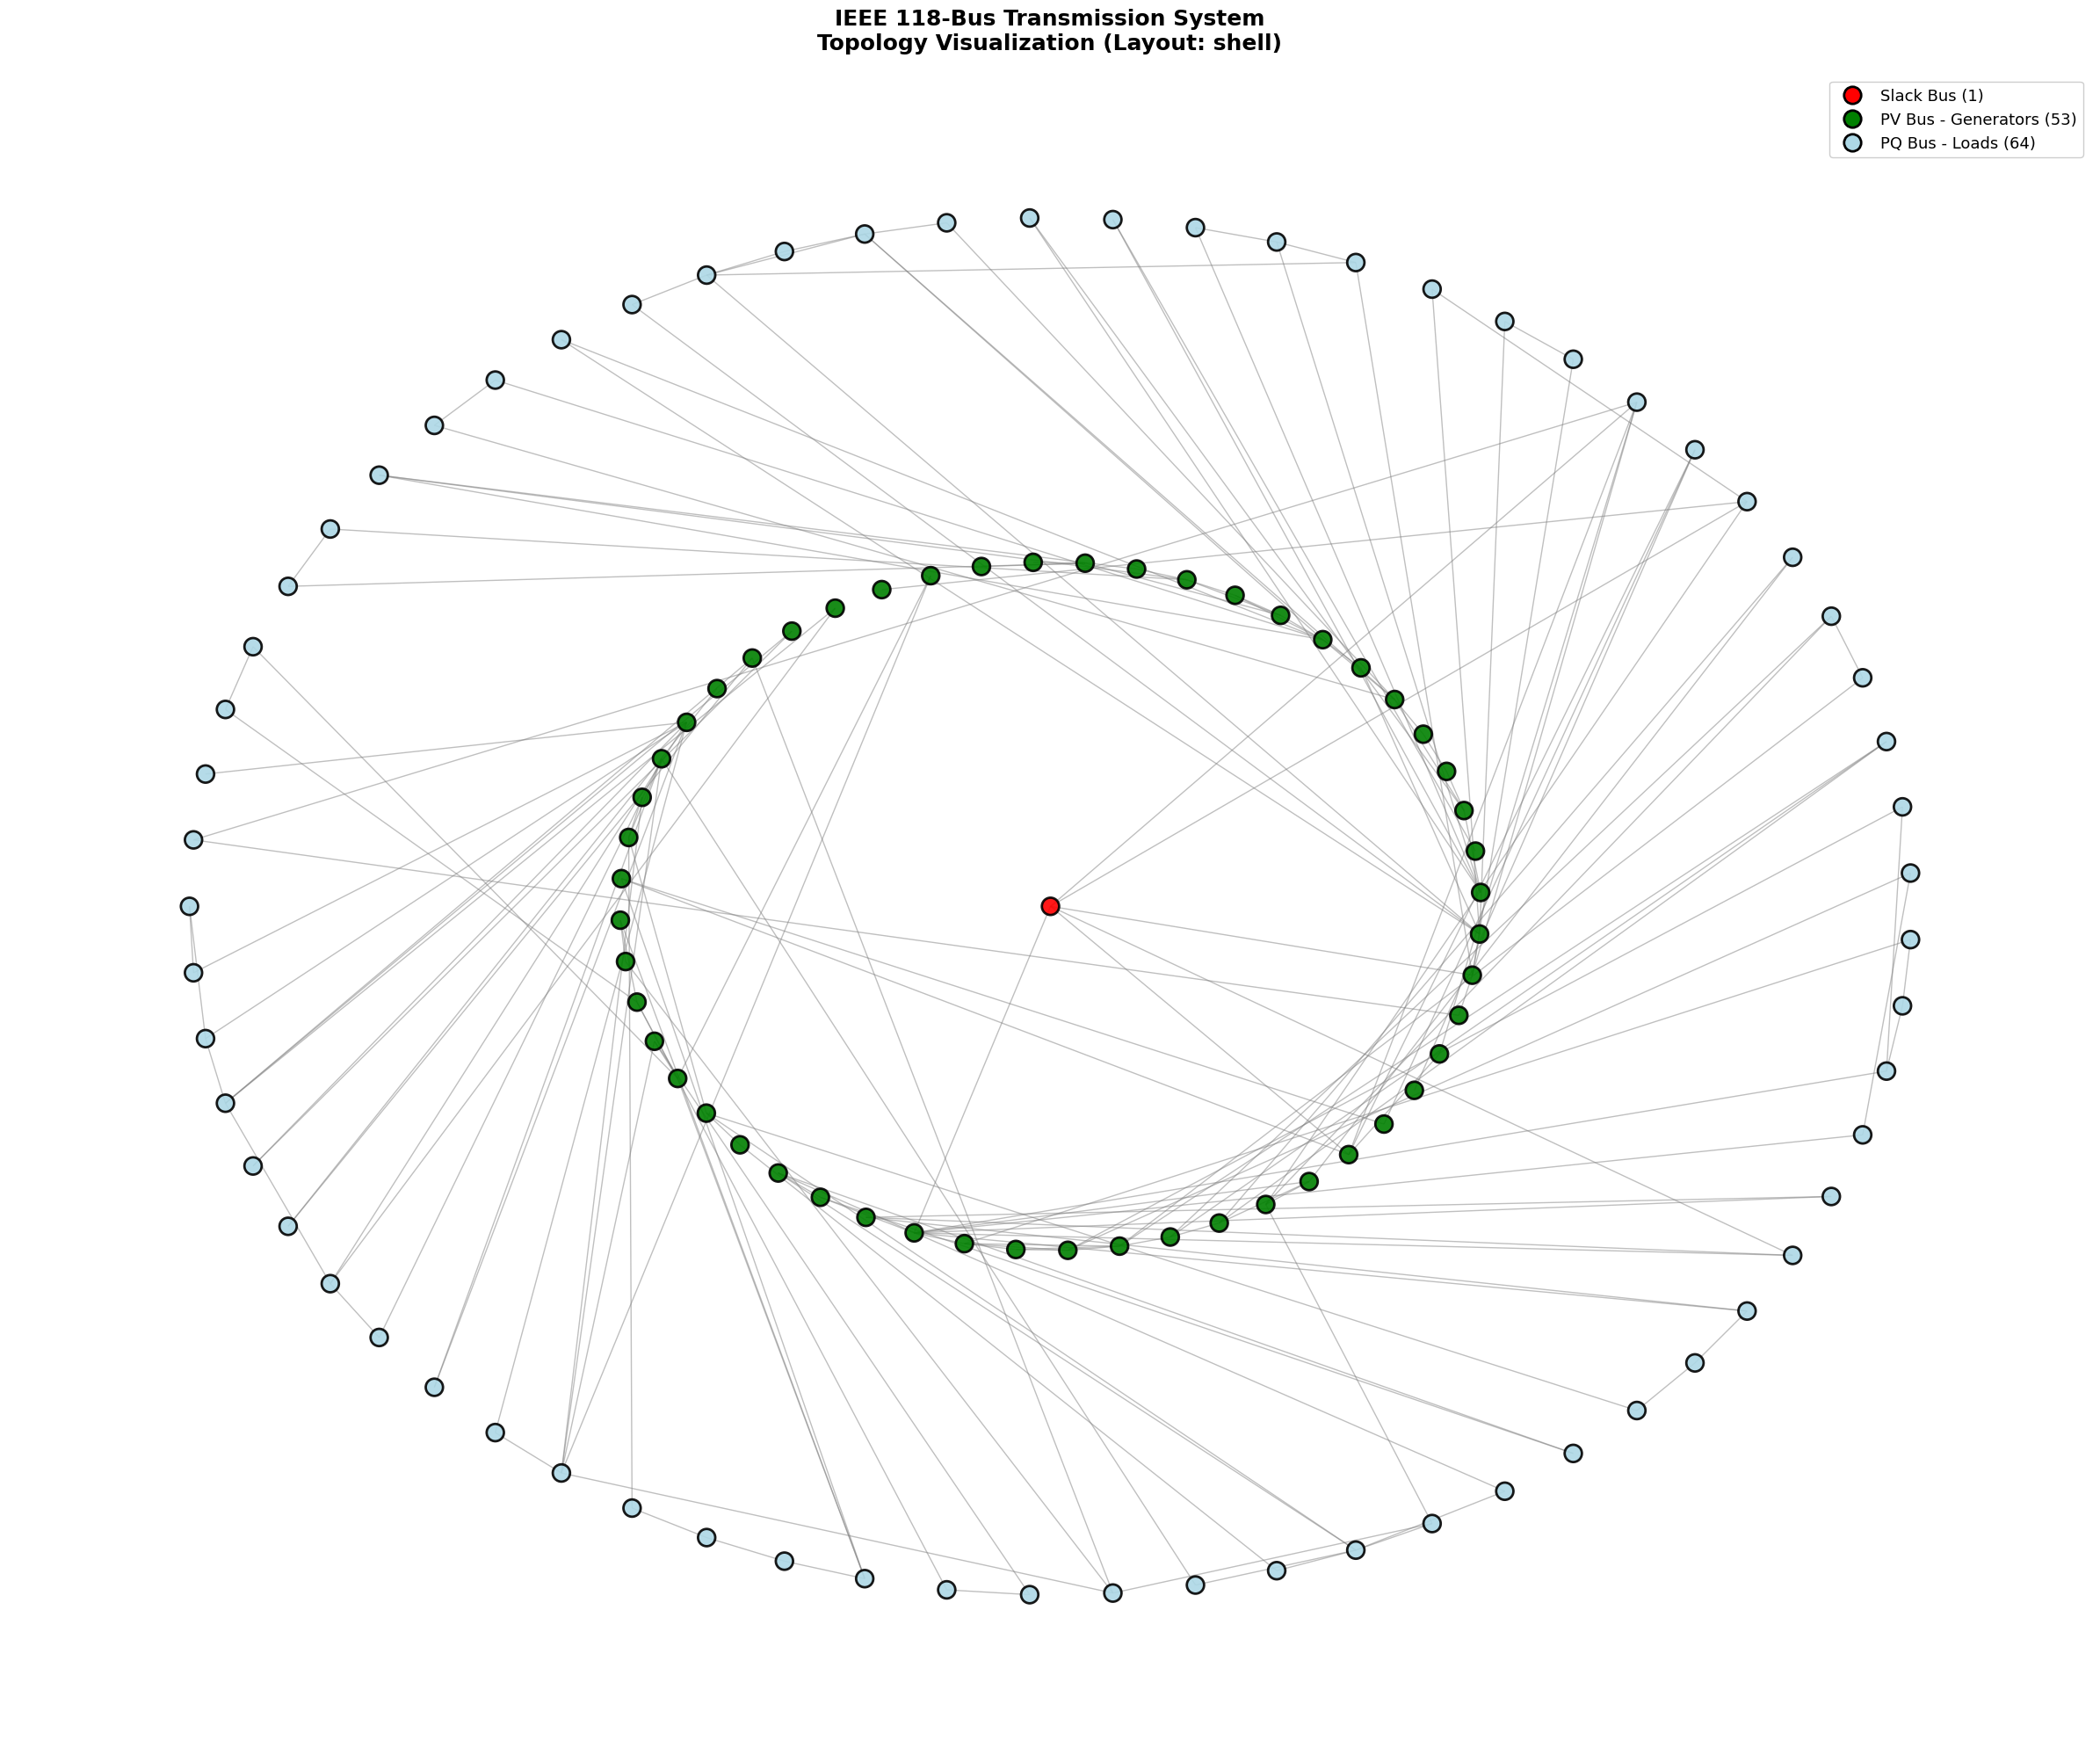

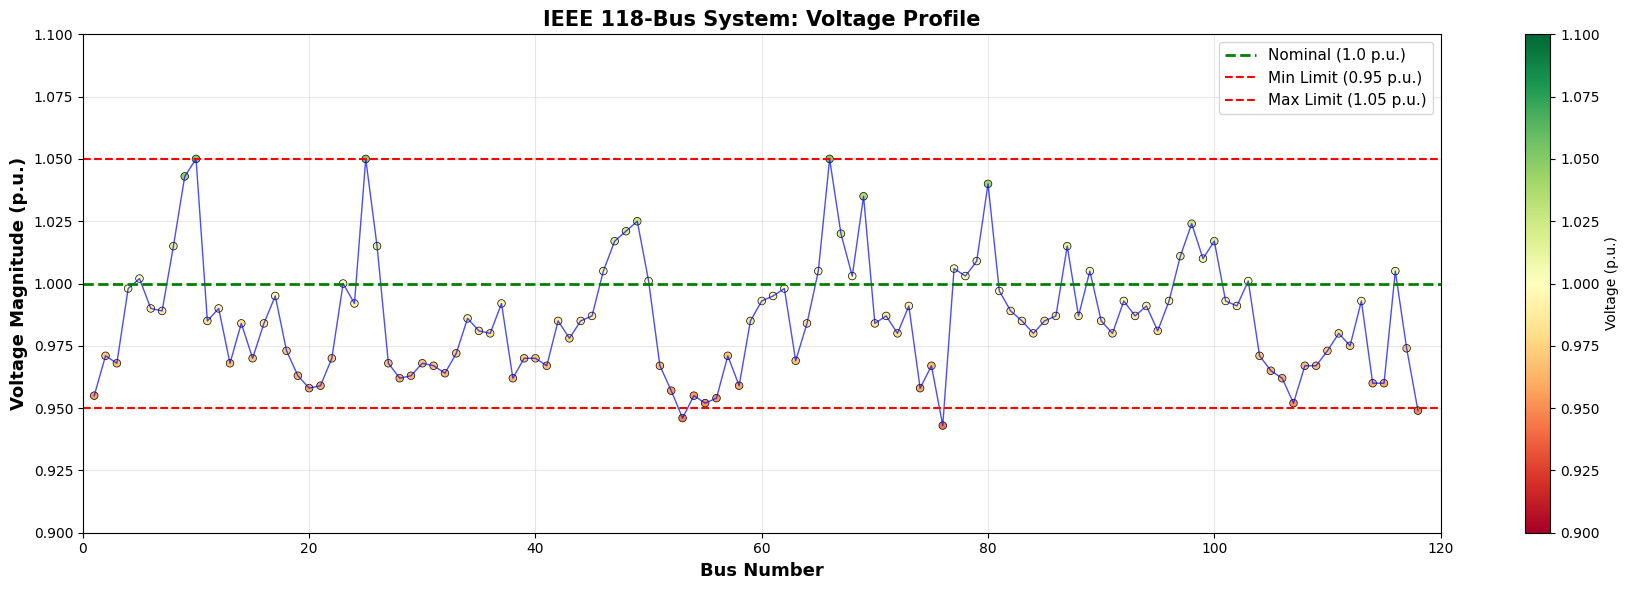

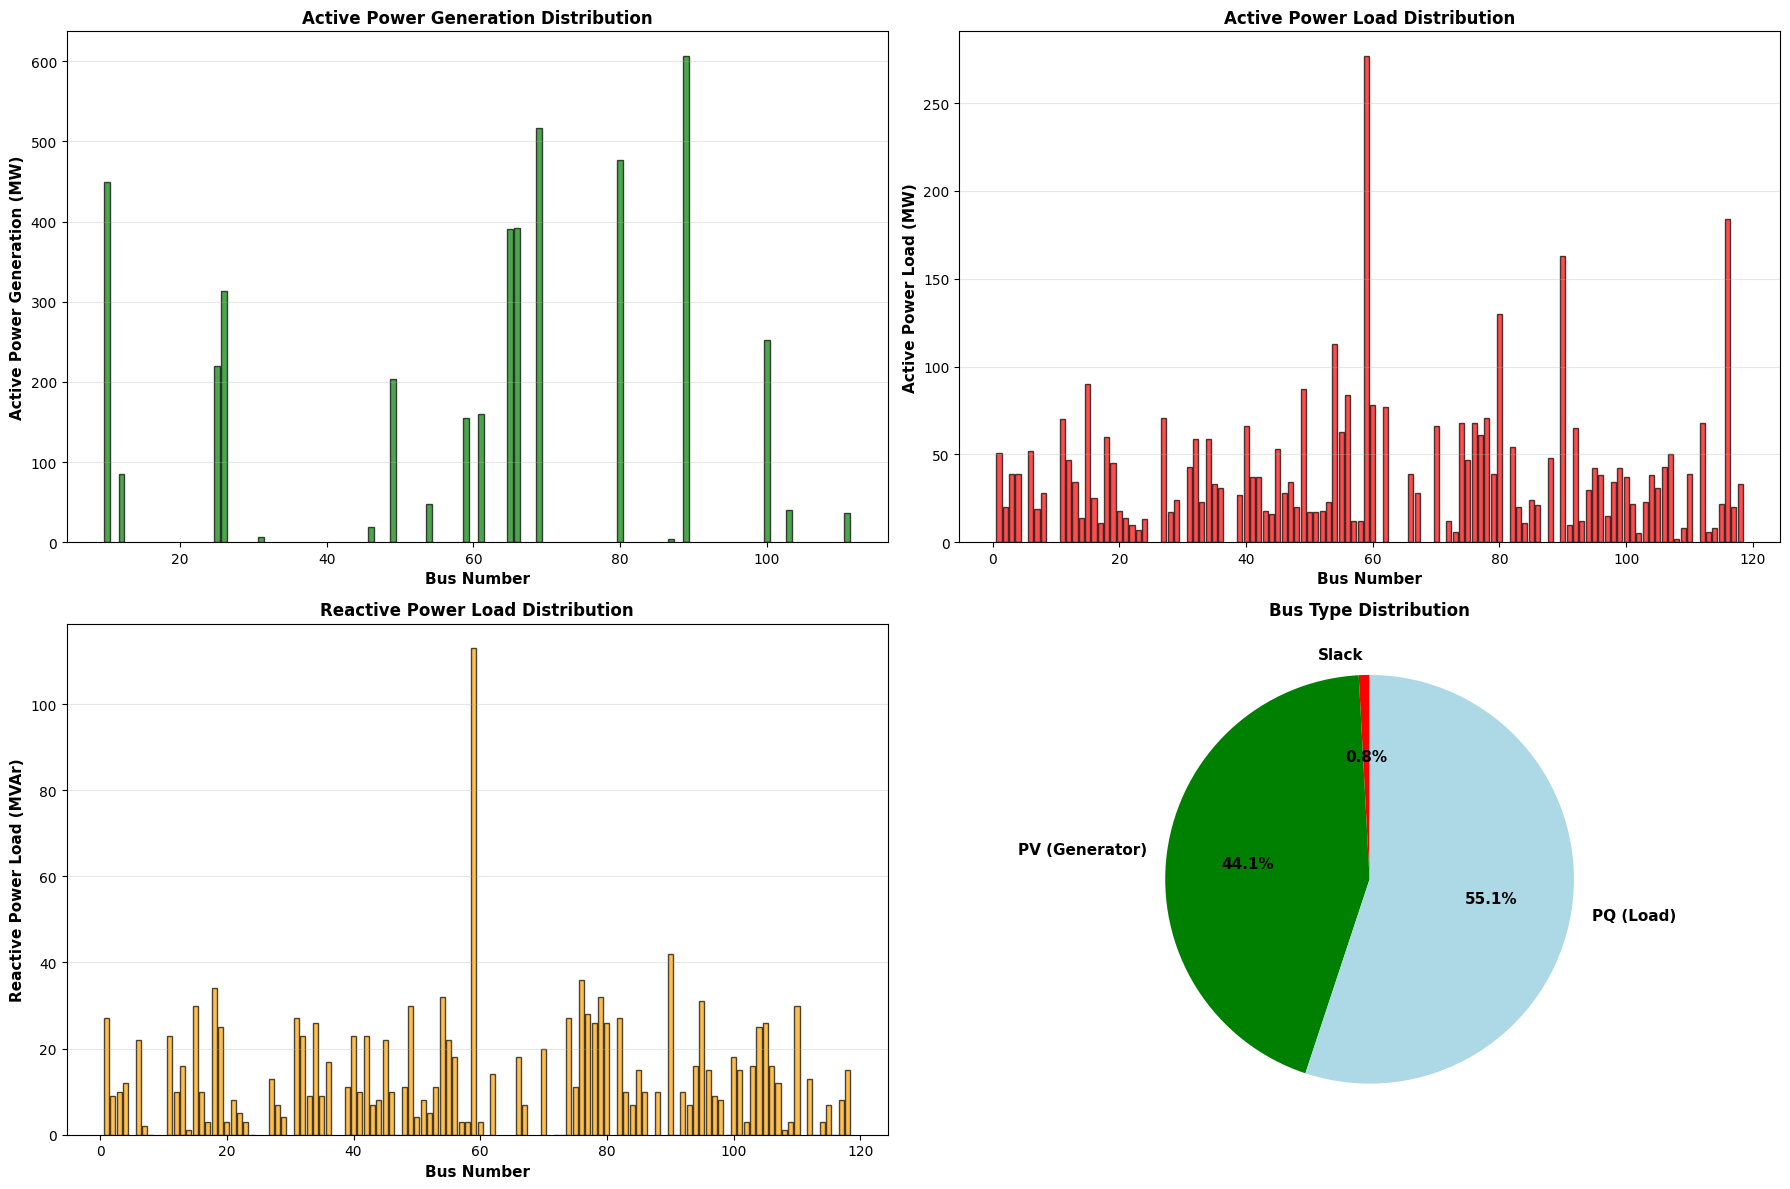

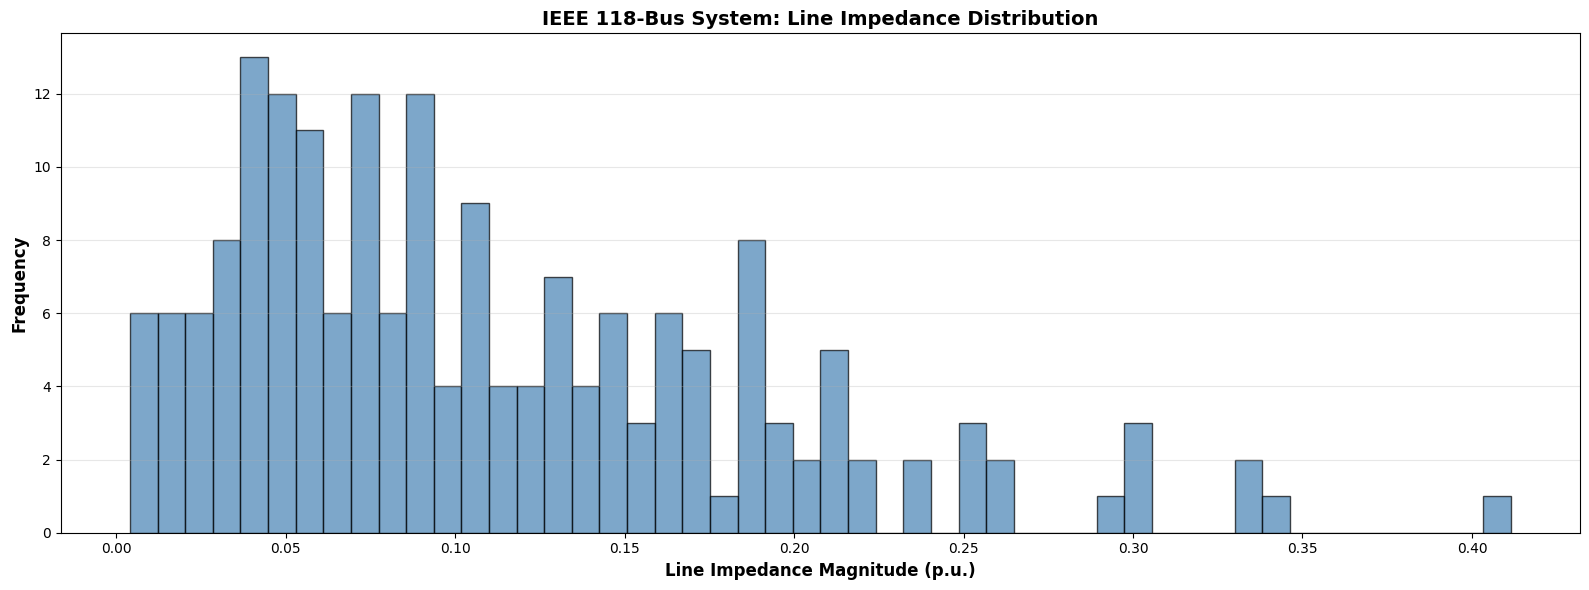

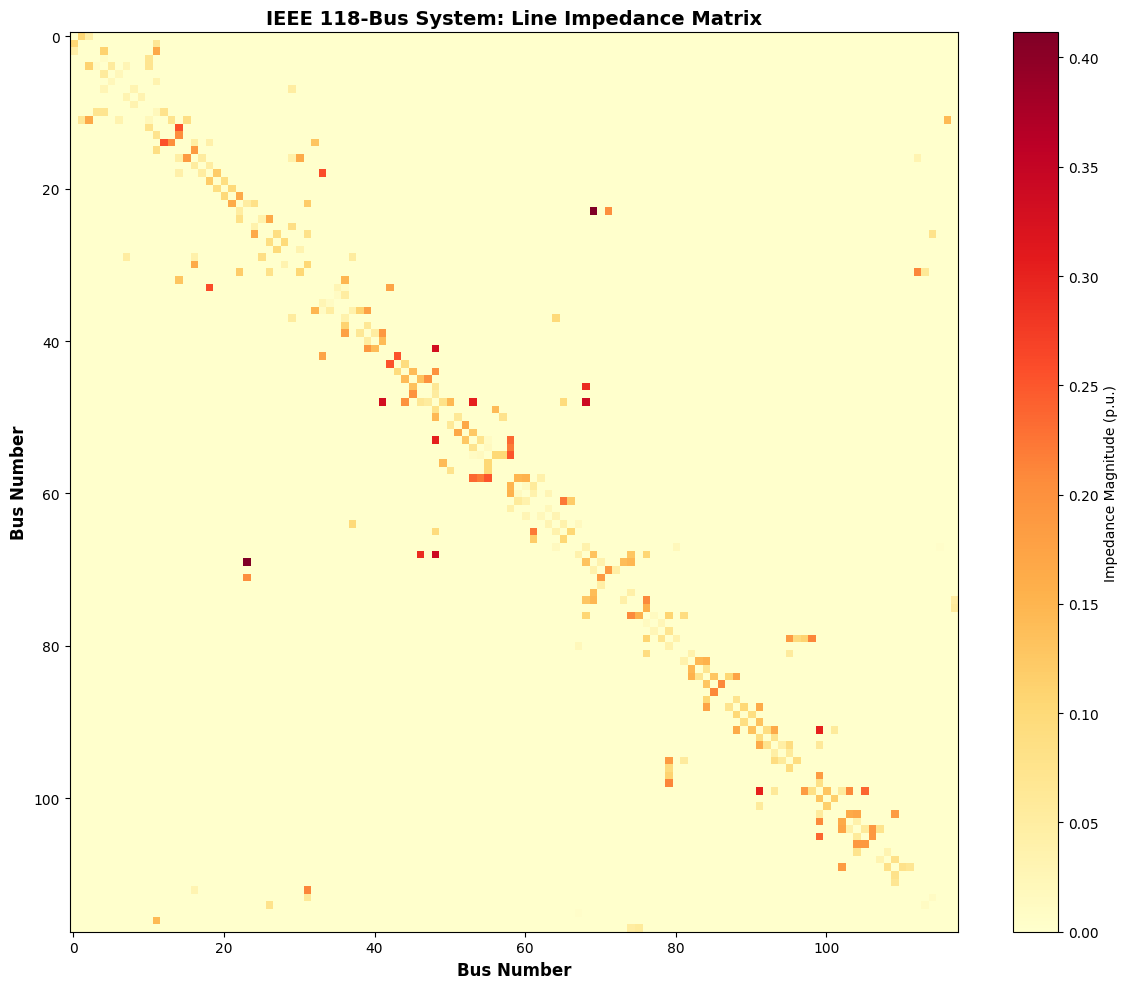

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from dataclasses import dataclass
from typing import List

@dataclass
class Bus:
    """
    Represents a bus in the power system
    
    Attributes:
        number: Bus identification number
        bus_type: 1=Slack/Swing, 2=PV/Generator, 3=PQ/Load
        voltage: Voltage magnitude in per unit (p.u.)
        angle: Voltage angle in radians
        p_gen: Active power generation in MW
        q_gen: Reactive power generation in MVAr
        p_load: Active power load in MW
        q_load: Reactive power load in MVAr
        q_max: Maximum reactive power limit (MVAr)
        q_min: Minimum reactive power limit (MVAr)
    """
    number: int
    bus_type: int
    voltage: float = 1.0
    angle: float = 0.0
    p_gen: float = 0.0
    q_gen: float = 0.0
    p_load: float = 0.0
    q_load: float = 0.0
    q_max: float = 999.0
    q_min: float = -999.0

@dataclass
class Branch:
    """
    Represents a branch (transmission line or transformer) in the power system
    
    Attributes:
        from_bus: Starting bus number
        to_bus: Ending bus number
        resistance: Line resistance in per unit (p.u.)
        reactance: Line reactance in per unit (p.u.)
        susceptance: Line charging susceptance in p.u.
        rating: Line thermal rating in MVA
        tap_ratio: Transformer tap ratio
        phase_shift: Phase shift angle in degrees
    """
    from_bus: int
    to_bus: int
    resistance: float
    reactance: float
    susceptance: float = 0.0
    rating: float = 9999.0
    tap_ratio: float = 0.0
    phase_shift: float = 0.0

class IEEE118BusSystem:
    """
    IEEE 118-Bus Transmission System
    
    This is a standard test system representing a portion of the American Electric
    Power System in the Midwestern US as of December 1962.
    
    Base Values:
        - Base MVA: 100 MVA
        - Total Generation: 4242 MW
        - Total Load: 4242 MW + j1438 MVAr
        - Number of Generators: 54
    """
    
    def __init__(self):
        self.name = "IEEE 118-Bus Transmission System"
        self.base_mva = 100.0  # Base power in MVA
        self.buses: List[Bus] = []
        self.branches: List[Branch] = []
        self._build_system()
    
    def _build_system(self):
        """Construct the complete IEEE 118-bus system"""
        self._create_buses()
        self._create_branches()
    
    def _create_buses(self):
        """
        Create all 118 buses with their generation and load data
        
        Data format: [Bus#, Type, V, P_gen, Q_gen, P_load, Q_load, Q_max, Q_min]
        Type: 1=Slack, 2=PV, 3=PQ
        """
        # IEEE 118-bus data (partial - key buses shown)
        # Complete data available from: MATPOWER case118.m
        bus_data = [
            # Bus, Type, V, P_gen, Q_gen, P_load, Q_load, Q_max, Q_min
            [1, 3, 0.955, 0, 0, 51, 27, 0, 0],
            [2, 3, 0.971, 0, 0, 20, 9, 0, 0],
            [3, 3, 0.968, 0, 0, 39, 10, 0, 0],
            [4, 2, 0.998, 0, 0, 39, 12, 15, -5],
            [5, 3, 1.002, 0, 0, 0, 0, 0, 0],
            [6, 2, 0.990, 0, 0, 52, 22, 50, -13],
            [7, 3, 0.989, 0, 0, 19, 2, 0, 0],
            [8, 2, 1.015, 0, 0, 28, 0, 300, -300],
            [9, 3, 1.043, 0, 0, 0, 0, 0, 0],
            [10, 2, 1.050, 450, 0, 0, 0, 200, -147],
            [11, 3, 0.985, 0, 0, 70, 23, 0, 0],
            [12, 2, 0.990, 85, 0, 47, 10, 120, -35],
            [13, 3, 0.968, 0, 0, 34, 16, 0, 0],
            [14, 3, 0.984, 0, 0, 14, 1, 0, 0],
            [15, 2, 0.970, 0, 0, 90, 30, 30, -10],
            [16, 3, 0.984, 0, 0, 25, 10, 0, 0],
            [17, 3, 0.995, 0, 0, 11, 3, 0, 0],
            [18, 2, 0.973, 0, 0, 60, 34, 50, -16],
            [19, 2, 0.963, 0, 0, 45, 25, 24, -8],
            [20, 3, 0.958, 0, 0, 18, 3, 0, 0],
            [21, 3, 0.959, 0, 0, 14, 8, 0, 0],
            [22, 3, 0.970, 0, 0, 10, 5, 0, 0],
            [23, 3, 1.000, 0, 0, 7, 3, 0, 0],
            [24, 2, 0.992, 0, 0, 13, 0, 300, -300],
            [25, 2, 1.050, 220, 0, 0, 0, 140, -47],
            [26, 2, 1.015, 314, 0, 0, 0, 1000, -1000],
            [27, 2, 0.968, 0, 0, 71, 13, 300, -300],
            [28, 3, 0.962, 0, 0, 17, 7, 0, 0],
            [29, 3, 0.963, 0, 0, 24, 4, 0, 0],
            [30, 3, 0.968, 0, 0, 0, 0, 0, 0],
            [31, 2, 0.967, 7, 0, 43, 27, 300, -300],
            [32, 2, 0.964, 0, 0, 59, 23, 42, -14],
            [33, 3, 0.972, 0, 0, 23, 9, 0, 0],
            [34, 2, 0.986, 0, 0, 59, 26, 24, -8],
            [35, 3, 0.981, 0, 0, 33, 9, 0, 0],
            [36, 2, 0.980, 0, 0, 31, 17, 24, -8],
            [37, 3, 0.992, 0, 0, 0, 0, 0, 0],
            [38, 3, 0.962, 0, 0, 0, 0, 0, 0],
            [39, 3, 0.970, 0, 0, 27, 11, 0, 0],
            [40, 2, 0.970, 0, 0, 66, 23, 24, -8],
            [41, 3, 0.967, 0, 0, 37, 10, 0, 0],
            [42, 2, 0.985, 0, 0, 37, 23, 24, -8],
            [43, 3, 0.978, 0, 0, 18, 7, 0, 0],
            [44, 3, 0.985, 0, 0, 16, 8, 0, 0],
            [45, 3, 0.987, 0, 0, 53, 22, 0, 0],
            [46, 2, 1.005, 19, 0, 28, 10, 100, -100],
            [47, 3, 1.017, 0, 0, 34, 0, 0, 0],
            [48, 3, 1.021, 0, 0, 20, 11, 0, 0],
            [49, 2, 1.025, 204, 0, 87, 30, 210, -85],
            [50, 3, 1.001, 0, 0, 17, 4, 0, 0],
            [51, 3, 0.967, 0, 0, 17, 8, 0, 0],
            [52, 3, 0.957, 0, 0, 18, 5, 0, 0],
            [53, 3, 0.946, 0, 0, 23, 11, 0, 0],
            [54, 2, 0.955, 48, 0, 113, 32, 300, -300],
            [55, 2, 0.952, 0, 0, 63, 22, 23, -8],
            [56, 2, 0.954, 0, 0, 84, 18, 15, -8],
            [57, 3, 0.971, 0, 0, 12, 3, 0, 0],
            [58, 3, 0.959, 0, 0, 12, 3, 0, 0],
            [59, 2, 0.985, 155, 0, 277, 113, 180, -60],
            [60, 3, 0.993, 0, 0, 78, 3, 0, 0],
            [61, 2, 0.995, 160, 0, 0, 0, 300, -100],
            [62, 2, 0.998, 0, 0, 77, 14, 20, -20],
            [63, 3, 0.969, 0, 0, 0, 0, 0, 0],
            [64, 3, 0.984, 0, 0, 0, 0, 0, 0],
            [65, 2, 1.005, 391, 0, 0, 0, 200, -67],
            [66, 2, 1.050, 392, 0, 39, 18, 200, -67],
            [67, 3, 1.020, 0, 0, 28, 7, 0, 0],
            [68, 3, 1.003, 0, 0, 0, 0, 0, 0],
            [69, 1, 1.035, 516.4, 0, 0, 0, 300, -300],  # Slack bus
            [70, 2, 0.984, 0, 0, 66, 20, 32, -10],
            [71, 3, 0.987, 0, 0, 0, 0, 0, 0],
            [72, 2, 0.980, 0, 0, 12, 0, 100, -100],
            [73, 2, 0.991, 0, 0, 6, 0, 100, -100],
            [74, 2, 0.958, 0, 0, 68, 27, 9, -6],
            [75, 3, 0.967, 0, 0, 47, 11, 0, 0],
            [76, 2, 0.943, 0, 0, 68, 36, 23, -8],
            [77, 2, 1.006, 0, 0, 61, 28, 70, -20],
            [78, 3, 1.003, 0, 0, 71, 26, 0, 0],
            [79, 3, 1.009, 0, 0, 39, 32, 0, 0],
            [80, 2, 1.040, 477, 0, 130, 26, 280, -165],
            [81, 3, 0.997, 0, 0, 0, 0, 0, 0],
            [82, 3, 0.989, 0, 0, 54, 27, 0, 0],
            [83, 3, 0.985, 0, 0, 20, 10, 0, 0],
            [84, 3, 0.980, 0, 0, 11, 7, 0, 0],
            [85, 2, 0.985, 0, 0, 24, 15, 23, -8],
            [86, 3, 0.987, 0, 0, 21, 10, 0, 0],
            [87, 2, 1.015, 4, 0, 0, 0, 1000, -100],
            [88, 3, 0.987, 0, 0, 48, 10, 0, 0],
            [89, 2, 1.005, 607, 0, 0, 0, 300, -210],
            [90, 2, 0.985, 0, 0, 163, 42, 300, -300],
            [91, 2, 0.980, 0, 0, 10, 0, 100, -100],
            [92, 2, 0.993, 0, 0, 65, 10, 9, -3],
            [93, 3, 0.987, 0, 0, 12, 7, 0, 0],
            [94, 3, 0.991, 0, 0, 30, 16, 0, 0],
            [95, 3, 0.981, 0, 0, 42, 31, 0, 0],
            [96, 3, 0.993, 0, 0, 38, 15, 0, 0],
            [97, 3, 1.011, 0, 0, 15, 9, 0, 0],
            [98, 3, 1.024, 0, 0, 34, 8, 0, 0],
            [99, 2, 1.010, 0, 0, 42, 0, 100, -100],
            [100, 2, 1.017, 252, 0, 37, 18, 155, -50],
            [101, 3, 0.993, 0, 0, 22, 15, 0, 0],
            [102, 3, 0.991, 0, 0, 5, 3, 0, 0],
            [103, 2, 1.001, 40, 0, 23, 16, 40, -15],
            [104, 2, 0.971, 0, 0, 38, 25, 23, -8],
            [105, 2, 0.965, 0, 0, 31, 26, 23, -8],
            [106, 3, 0.962, 0, 0, 43, 16, 0, 0],
            [107, 2, 0.952, 0, 0, 50, 12, 200, -200],
            [108, 3, 0.967, 0, 0, 2, 1, 0, 0],
            [109, 3, 0.967, 0, 0, 8, 3, 0, 0],
            [110, 2, 0.973, 0, 0, 39, 30, 23, -8],
            [111, 2, 0.980, 36, 0, 0, 0, 1000, -100],
            [112, 2, 0.975, 0, 0, 68, 13, 1000, -100],
            [113, 2, 0.993, 0, 0, 6, 0, 200, -100],
            [114, 3, 0.960, 0, 0, 8, 3, 0, 0],
            [115, 3, 0.960, 0, 0, 22, 7, 0, 0],
            [116, 2, 1.005, 0, 0, 184, 0, 1000, -1000],
            [117, 3, 0.974, 0, 0, 20, 8, 0, 0],
            [118, 3, 0.949, 0, 0, 33, 15, 0, 0]
        ]
        
        # Create bus objects
        for data in bus_data:
            bus_num, bus_type, v, p_gen, q_gen, p_load, q_load, q_max, q_min = data
            self.buses.append(Bus(
                number=bus_num,
                bus_type=bus_type,
                voltage=v,
                angle=0.0,
                p_gen=p_gen,
                q_gen=q_gen,
                p_load=p_load,
                q_load=q_load,
                q_max=q_max,
                q_min=q_min
            ))
    
    def _create_branches(self):
        """
        Create all branches (lines and transformers)
        
        Data format: [From, To, R, X, B, Rating, Tap, Shift]
        """
        # IEEE 118-bus branch data
        branch_data = [
            [1, 2, 0.0303, 0.0999, 0.0254, 175, 0, 0],
            [1, 3, 0.0129, 0.0424, 0.0108, 175, 0, 0],
            [4, 5, 0.00176, 0.00798, 0.0021, 500, 0, 0],
            [3, 5, 0.0241, 0.108, 0.0284, 175, 0, 0],
            [5, 6, 0.0119, 0.054, 0.0143, 175, 0, 0],
            [6, 7, 0.00459, 0.0208, 0.0055, 500, 0, 0],
            [8, 9, 0.00244, 0.0305, 1.162, 500, 0, 0],
            [8, 5, 0, 0.0267, 0, 500, 0.985, 0],
            [9, 10, 0.00258, 0.0322, 1.23, 500, 0, 0],
            [4, 11, 0.0209, 0.0688, 0.0175, 175, 0, 0],
            [5, 11, 0.0203, 0.0682, 0.0174, 175, 0, 0],
            [11, 12, 0.00595, 0.0196, 0.0502, 500, 0, 0],
            [2, 12, 0.0187, 0.0616, 0.0157, 175, 0, 0],
            [3, 12, 0.0484, 0.16, 0.0406, 175, 0, 0],
            [7, 12, 0.00862, 0.034, 0.00874, 500, 0, 0],
            [11, 13, 0.02225, 0.0731, 0.0187, 500, 0, 0],
            [12, 14, 0.0215, 0.0707, 0.0181, 175, 0, 0],
            [13, 15, 0.0744, 0.2444, 0.0627, 175, 0, 0],
            [14, 15, 0.0595, 0.195, 0.0502, 175, 0, 0],
            [12, 16, 0.0212, 0.0834, 0.0214, 175, 0, 0],
            [15, 17, 0.0132, 0.0437, 0.0444, 175, 0, 0],
            [16, 17, 0.0454, 0.1801, 0.0466, 175, 0, 0],
            [17, 18, 0.0123, 0.0505, 0.01298, 175, 0, 0],
            [18, 19, 0.01119, 0.0493, 0.01142, 175, 0, 0],
            [19, 20, 0.0252, 0.117, 0.0298, 175, 0, 0],
            [15, 19, 0.012, 0.0394, 0.0101, 175, 0, 0],
            [20, 21, 0.0183, 0.0849, 0.0216, 175, 0, 0],
            [21, 22, 0.0209, 0.097, 0.0246, 175, 0, 0],
            [22, 23, 0.0342, 0.159, 0.0404, 175, 0, 0],
            [23, 24, 0.0135, 0.0492, 0.0498, 500, 0, 0],
            [23, 25, 0.0156, 0.08, 0.0864, 175, 0, 0],
            [26, 25, 0, 0.0382, 0, 500, 0.96, 0],
            [25, 27, 0.0318, 0.163, 0.1764, 175, 0, 0],
            [27, 28, 0.01913, 0.0855, 0.0216, 175, 0, 0],
            [28, 29, 0.0237, 0.0943, 0.0238, 175, 0, 0],
            [30, 17, 0, 0.0388, 0, 500, 0.96, 0],
            [8, 30, 0.00431, 0.0504, 0.514, 500, 0, 0],
            [26, 30, 0.00799, 0.086, 0.908, 500, 0, 0],
            [17, 31, 0.0474, 0.1563, 0.0399, 175, 0, 0],
            [29, 31, 0.0108, 0.0331, 0.0083, 175, 0, 0],
            [23, 32, 0.0317, 0.1153, 0.1173, 175, 0, 0],
            [31, 32, 0.0298, 0.0985, 0.0251, 175, 0, 0],
            [27, 32, 0.0229, 0.0755, 0.0193, 175, 0, 0],
            [15, 33, 0.038, 0.1244, 0.319, 175, 0, 0],
            [19, 34, 0.0752, 0.247, 0.0632, 175, 0, 0],
            [35, 36, 0.00224, 0.0102, 0.00268, 500, 0, 0],
            [35, 37, 0.011, 0.0497, 0.01318, 175, 0, 0],
            [33, 37, 0.0415, 0.142, 0.0366, 175, 0, 0],
            [34, 36, 0.00871, 0.0268, 0.00568, 175, 0, 0],
            [34, 37, 0.00256, 0.0094, 0.00984, 500, 0, 0],
            [38, 37, 0, 0.0375, 0, 500, 0.935, 0],
            [37, 39, 0.0321, 0.106, 0.027, 175, 0, 0],
            [37, 40, 0.0593, 0.168, 0.042, 175, 0, 0],
            [30, 38, 0.00464, 0.054, 0.422, 500, 0, 0],
            [39, 40, 0.0184, 0.0605, 0.01552, 175, 0, 0],
            [40, 41, 0.0145, 0.0487, 0.01222, 175, 0, 0],
            [40, 42, 0.0555, 0.183, 0.0466, 175, 0, 0],
            [41, 42, 0.041, 0.135, 0.0344, 175, 0, 0],
            [43, 44, 0.0608, 0.2454, 0.06068, 175, 0, 0],
            [34, 43, 0.0413, 0.1681, 0.04226, 175, 0, 0],
            [44, 45, 0.0224, 0.0901, 0.0224, 175, 0, 0],
            [45, 46, 0.04, 0.1356, 0.0332, 175, 0, 0],
            [46, 47, 0.038, 0.127, 0.0316, 175, 0, 0],
            [46, 48, 0.0601, 0.189, 0.0472, 175, 0, 0],
            [47, 49, 0.0191, 0.0625, 0.01604, 175, 0, 0],
            [42, 49, 0.0715, 0.323, 0.086, 175, 0, 0],
            [42, 49, 0.0715, 0.323, 0.086, 175, 0, 0],
            [45, 49, 0.0684, 0.186, 0.0444, 175, 0, 0],
            [48, 49, 0.0179, 0.0505, 0.01258, 175, 0, 0],
            [49, 50, 0.0267, 0.0752, 0.01874, 175, 0, 0],
            [49, 51, 0.0486, 0.137, 0.0342, 175, 0, 0],
            [51, 52, 0.0203, 0.0588, 0.01396, 175, 0, 0],
            [52, 53, 0.0405, 0.1635, 0.04058, 175, 0, 0],
            [53, 54, 0.0263, 0.122, 0.031, 175, 0, 0],
            [49, 54, 0.073, 0.289, 0.0738, 175, 0, 0],
            [49, 54, 0.0869, 0.291, 0.073, 175, 0, 0],
            [54, 55, 0.0169, 0.0707, 0.0202, 175, 0, 0],
            [54, 56, 0.00275, 0.00955, 0.00732, 500, 0, 0],
            [55, 56, 0.00488, 0.0151, 0.00374, 175, 0, 0],
            [56, 57, 0.0343, 0.0966, 0.0242, 175, 0, 0],
            [50, 57, 0.0474, 0.134, 0.0332, 175, 0, 0],
            [56, 58, 0.0343, 0.0966, 0.0242, 175, 0, 0],
            [51, 58, 0.0255, 0.0719, 0.01788, 175, 0, 0],
            [54, 59, 0.0503, 0.2293, 0.0598, 175, 0, 0],
            [56, 59, 0.0825, 0.251, 0.0569, 175, 0, 0],
            [56, 59, 0.0803, 0.239, 0.0536, 175, 0, 0],
            [55, 59, 0.04739, 0.2158, 0.05646, 175, 0, 0],
            [59, 60, 0.0317, 0.145, 0.0376, 175, 0, 0],
            [59, 61, 0.0328, 0.15, 0.0388, 175, 0, 0],
            [60, 61, 0.00264, 0.0135, 0.01456, 500, 0, 0],
            [60, 62, 0.0123, 0.0561, 0.01468, 175, 0, 0],
            [61, 62, 0.00824, 0.0376, 0.0098, 175, 0, 0],
            [63, 59, 0, 0.0386, 0, 500, 0.96, 0],
            [63, 64, 0.00172, 0.02, 0.216, 500, 0, 0],
            [64, 61, 0, 0.0268, 0, 500, 0.985, 0],
            [38, 65, 0.00901, 0.0986, 1.046, 500, 0, 0],
            [64, 65, 0.00269, 0.0302, 0.38, 500, 0, 0],
            [49, 66, 0.018, 0.0919, 0.0248, 175, 0, 0],
            [49, 66, 0.018, 0.0919, 0.0248, 175, 0, 0],
            [62, 66, 0.0482, 0.218, 0.0578, 175, 0, 0],
            [62, 67, 0.0258, 0.117, 0.031, 175, 0, 0],
            [65, 66, 0, 0.037, 0, 500, 0.935, 0],
            [66, 67, 0.0224, 0.1015, 0.02682, 175, 0, 0],
            [65, 68, 0.00138, 0.016, 0.638, 500, 0, 0],
            [47, 69, 0.0844, 0.2778, 0.07092, 175, 0, 0],
            [49, 69, 0.0985, 0.324, 0.0828, 175, 0, 0],
            [68, 69, 0, 0.037, 0, 500, 0.935, 0],
            [69, 70, 0.03, 0.127, 0.122, 175, 0, 0],
            [24, 70, 0.00221, 0.4115, 0.10198, 175, 0, 0],
            [70, 71, 0.00882, 0.0355, 0.00878, 175, 0, 0],
            [24, 72, 0.0488, 0.196, 0.0488, 175, 0, 0],
            [71, 72, 0.0446, 0.18, 0.04444, 175, 0, 0],
            [71, 73, 0.00866, 0.0454, 0.01178, 175, 0, 0],
            [70, 74, 0.0401, 0.1323, 0.03368, 175, 0, 0],
            [70, 75, 0.0428, 0.141, 0.036, 175, 0, 0],
            [69, 75, 0.0405, 0.122, 0.124, 175, 0, 0],
            [74, 75, 0.0123, 0.0406, 0.01034, 175, 0, 0],
            [76, 77, 0.0444, 0.148, 0.0368, 175, 0, 0],
            [69, 77, 0.0309, 0.101, 0.1038, 175, 0, 0],
            [75, 77, 0.0601, 0.1999, 0.04978, 175, 0, 0],
            [77, 78, 0.00376, 0.0124, 0.01264, 500, 0, 0],
            [78, 79, 0.00546, 0.0244, 0.00648, 500, 0, 0],
            [77, 80, 0.017, 0.0485, 0.0472, 500, 0, 0],
            [77, 80, 0.0294, 0.105, 0.0228, 175, 0, 0],
            [79, 80, 0.0156, 0.0704, 0.0187, 175, 0, 0],
            [68, 81, 0.00175, 0.0202, 0.808, 500, 0, 0],
            [81, 80, 0, 0.037, 0, 500, 0.935, 0],
            [77, 82, 0.0298, 0.0853, 0.08174, 175, 0, 0],
            [82, 83, 0.0112, 0.03665, 0.03796, 175, 0, 0],
            [83, 84, 0.0625, 0.132, 0.0258, 175, 0, 0],
            [83, 85, 0.043, 0.148, 0.0348, 175, 0, 0],
            [84, 85, 0.0302, 0.0641, 0.01234, 175, 0, 0],
            [85, 86, 0.035, 0.123, 0.0276, 175, 0, 0],
            [86, 87, 0.02828, 0.2074, 0.0445, 500, 0, 0],
            [85, 88, 0.02, 0.102, 0.0276, 175, 0, 0],
            [85, 89, 0.0239, 0.173, 0.047, 175, 0, 0],
            [88, 89, 0.0139, 0.0712, 0.01934, 175, 0, 0],
            [89, 90, 0.0518, 0.188, 0.0528, 175, 0, 0],
            [89, 90, 0.0238, 0.0997, 0.106, 175, 0, 0],
            [90, 91, 0.0254, 0.0836, 0.0214, 175, 0, 0],
            [89, 92, 0.0099, 0.0505, 0.0548, 175, 0, 0],
            [89, 92, 0.0393, 0.1581, 0.0414, 175, 0, 0],
            [91, 92, 0.0387, 0.1272, 0.03268, 175, 0, 0],
            [92, 93, 0.0258, 0.0848, 0.0218, 175, 0, 0],
            [92, 94, 0.0481, 0.158, 0.0406, 175, 0, 0],
            [93, 94, 0.0223, 0.0732, 0.01876, 175, 0, 0],
            [94, 95, 0.0132, 0.0434, 0.0111, 175, 0, 0],
            [80, 96, 0.0356, 0.182, 0.0494, 175, 0, 0],
            [82, 96, 0.0162, 0.053, 0.0544, 175, 0, 0],
            [94, 96, 0.0269, 0.0869, 0.023, 175, 0, 0],
            [80, 97, 0.0183, 0.0934, 0.0254, 175, 0, 0],
            [80, 98, 0.0238, 0.108, 0.0286, 175, 0, 0],
            [80, 99, 0.0454, 0.206, 0.0546, 175, 0, 0],
            [92, 100, 0.0648, 0.295, 0.0472, 175, 0, 0],
            [94, 100, 0.0178, 0.058, 0.0604, 175, 0, 0],
            [95, 96, 0.0171, 0.0547, 0.01474, 175, 0, 0],
            [96, 97, 0.0173, 0.0885, 0.024, 175, 0, 0],
            [98, 100, 0.0397, 0.179, 0.0476, 175, 0, 0],
            [99, 100, 0.018, 0.0813, 0.0216, 175, 0, 0],
            [100, 101, 0.0277, 0.1262, 0.0328, 175, 0, 0],
            [92, 102, 0.0123, 0.0559, 0.01464, 175, 0, 0],
            [101, 102, 0.0246, 0.112, 0.0294, 175, 0, 0],
            [100, 103, 0.016, 0.0525, 0.0536, 175, 0, 0],
            [100, 104, 0.0451, 0.204, 0.0541, 175, 0, 0],
            [103, 104, 0.0466, 0.1584, 0.0407, 175, 0, 0],
            [103, 105, 0.0535, 0.1625, 0.0408, 175, 0, 0],
            [100, 106, 0.0605, 0.229, 0.062, 175, 0, 0],
            [104, 105, 0.00994, 0.0378, 0.00986, 175, 0, 0],
            [105, 106, 0.014, 0.0547, 0.01434, 175, 0, 0],
            [105, 107, 0.053, 0.183, 0.0472, 175, 0, 0],
            [105, 108, 0.0261, 0.0703, 0.01844, 175, 0, 0],
            [106, 107, 0.053, 0.183, 0.0472, 175, 0, 0],
            [108, 109, 0.0105, 0.0288, 0.0076, 175, 0, 0],
            [103, 110, 0.03906, 0.1813, 0.0461, 175, 0, 0],
            [109, 110, 0.0278, 0.0762, 0.0202, 175, 0, 0],
            [110, 111, 0.022, 0.0755, 0.02, 175, 0, 0],
            [110, 112, 0.0247, 0.064, 0.062, 175, 0, 0],
            [17, 113, 0.00913, 0.0301, 0.00768, 175, 0, 0],
            [32, 113, 0.0615, 0.203, 0.0518, 175, 0, 0],
            [32, 114, 0.0135, 0.0612, 0.01628, 175, 0, 0],
            [27, 115, 0.0164, 0.0741, 0.01972, 175, 0, 0],
            [114, 115, 0.0023, 0.0104, 0.00276, 175, 0, 0],
            [68, 116, 0.00034, 0.00405, 0.164, 500, 0, 0],
            [12, 117, 0.0329, 0.14, 0.0358, 175, 0, 0],
            [75, 118, 0.0145, 0.0481, 0.01198, 175, 0, 0],
            [76, 118, 0.0164, 0.0544, 0.01356, 175, 0, 0]
        ]
        
        # Create branch objects
        for data in branch_data:
            from_bus, to_bus, r, x, b, rating, tap, shift = data
            self.branches.append(Branch(
                from_bus=from_bus,
                to_bus=to_bus,
                resistance=r,
                reactance=x,
                susceptance=b,
                rating=rating,
                tap_ratio=tap,))
    
    def get_bus_data(self) -> pd.DataFrame:
        """Return bus data as a pandas DataFrame"""
        bus_data = []
        for bus in self.buses:
            bus_type_str = ['', 'Slack', 'PV', 'PQ'][bus.bus_type]
            bus_data.append({
                'Bus': bus.number,
                'Type': bus_type_str,
                'V (p.u.)': f"{bus.voltage:.4f}",
                'Angle (deg)': f"{np.degrees(bus.angle):.2f}",
                'P_Gen (MW)': f"{bus.p_gen:.2f}",
                'Q_Gen (MVAr)': f"{bus.q_gen:.2f}",
                'P_Load (MW)': f"{bus.p_load:.2f}",
                'Q_Load (MVAr)': f"{bus.q_load:.2f}"
            })
        return pd.DataFrame(bus_data)
    
    def get_branch_data(self) -> pd.DataFrame:
        """Return branch data as a pandas DataFrame"""
        branch_data = []
        for branch in self.branches:
            branch_data.append({
                'From': branch.from_bus,
                'To': branch.to_bus,
                'R (p.u.)': f"{branch.resistance:.6f}",
                'X (p.u.)': f"{branch.reactance:.6f}",
                'B (p.u.)': f"{branch.susceptance:.6f}",
                'Rating (MVA)': branch.rating
            })
        return pd.DataFrame(branch_data)
    
    def get_ybus_matrix(self) -> np.ndarray:
        """Calculate the bus admittance matrix (Y-bus)"""
        n_buses = len(self.buses)
        Y = np.zeros((n_buses, n_buses), dtype=complex)
        
        for branch in self.branches:
            i = branch.from_bus - 1
            j = branch.to_bus - 1
            
            # Branch admittance
            z = branch.resistance + 1j * branch.reactance
            y = 1.0 / z if abs(z) > 1e-10 else 0.0
            
            # Shunt admittance
            y_shunt = 1j * branch.susceptance / 2.0
            
            if branch.tap_ratio != 0:  # Transformer
                tap = branch.tap_ratio
                Y[i, j] -= y / tap
                Y[j, i] -= y / tap
                Y[i, i] += y / (tap ** 2) + y_shunt
                Y[j, j] += y + y_shunt
            else:  # Transmission line
                Y[i, j] -= y
                Y[j, i] -= y
                Y[i, i] += y + y_shunt
                Y[j, j] += y + y_shunt
        
        return Y
    
    def print_system_info(self):
        """Print comprehensive system information"""
        print("="*70)
        print(f"{self.name}")
        print("="*70)
        print(f"Base MVA: {self.base_mva} MVA")
        print(f"Number of Buses: {len(self.buses)}")
        print(f"Number of Branches: {len(self.branches)}")
        
        # Count bus types
        n_slack = sum(1 for bus in self.buses if bus.bus_type == 1)
        n_pv = sum(1 for bus in self.buses if bus.bus_type == 2)
        n_pq = sum(1 for bus in self.buses if bus.bus_type == 3)
        print(f"Slack Buses: {n_slack}, PV Buses: {n_pv}, PQ Buses: {n_pq}")
        
        # Calculate totals
        total_gen_p = sum(bus.p_gen for bus in self.buses)
        total_load_p = sum(bus.p_load for bus in self.buses)
        total_load_q = sum(bus.q_load for bus in self.buses)
        
        print(f"Total Generation: {total_gen_p:.2f} MW")
        print(f"Total Load: {total_load_p:.2f} MW + j{total_load_q:.2f} MVAr")
        print("="*70)
    
    def plot_topology(self, figsize=(24, 20), show_bus_labels=True, 
                      node_size=200, layout='diagram'):
        """
        Visualize the system topology
        
        Args:
            figsize: Figure size
            show_bus_labels: Whether to show bus numbers
            node_size: Size of nodes
            layout: 'diagram' (single-line diagram), 'shell', 'spectral', or 'kamada_kawai'
        """
        G = nx.Graph()
        
        for bus in self.buses:
            G.add_node(bus.number)
        
        for branch in self.branches:
            G.add_edge(branch.from_bus, branch.to_bus)
        
        plt.figure(figsize=figsize)
        
        # Choose layout
        if layout == 'diagram':
            # Use the custom single-line diagram layout
            pos = self._single_line_diagram_layout()
        elif layout == 'shell':
            # Shell layout groups buses in concentric circles
            nlist = [
                [bus.number for bus in self.buses if bus.bus_type == 1],  # Slack in center
                [bus.number for bus in self.buses if bus.bus_type == 2],  # PV in middle
                [bus.number for bus in self.buses if bus.bus_type == 3]   # PQ on outside
            ]
            pos = nx.shell_layout(G, nlist=nlist)
        elif layout == 'spectral':
            pos = nx.spectral_layout(G)
        else:
            pos = nx.kamada_kawai_layout(G)
        
        # Color nodes by type
        node_colors = []
        for bus in self.buses:
            if bus.bus_type == 1:  # Slack
                node_colors.append('red')
            elif bus.bus_type == 2:  # PV
                node_colors.append('green')
            else:  # PQ
                node_colors.append('lightblue')
        
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, 
                              node_size=node_size, alpha=0.9, 
                              edgecolors='black', linewidths=2)
        
        nx.draw_networkx_edges(G, pos, edge_color='gray', 
                              width=1, alpha=0.5)
        
        if show_bus_labels:
            labels = {bus.number: str(bus.number) for bus in self.buses}
            nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold')
        
        # Legend
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='red', markersize=14, 
                      label=f'Slack Bus (1)', markeredgecolor='black', markeredgewidth=2),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='green', markersize=14, 
                      label=f'PV Bus - Generators (53)', markeredgecolor='black', markeredgewidth=2),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='lightblue', markersize=14, 
                      label=f'PQ Bus - Loads (64)', markeredgecolor='black', markeredgewidth=2)
        ]
        plt.legend(handles=legend_elements, loc='upper right', fontsize=13, framealpha=0.95)
        
        plt.title(f"{self.name}\nTopology Visualization (Layout: {layout})", 
                 fontsize=18, fontweight='bold', pad=20)
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    
    def _single_line_diagram_layout(self):
        """
        Create layout based on the actual IEEE 118-bus single line diagram
        This matches the standard representation shown in technical papers
        """
        pos = {}
        
        # Based on the actual IEEE 118-bus diagram structure
        # Left vertical column (buses 1-9)
        for i, bus in enumerate([1, 2, 3, 4, 5, 6, 7, 8, 9]):
            pos[bus] = (1, 20 - i * 2.2)
        
        # Left lateral branches (horizontal from main column)
        laterals_left = {
            10: (-1, 20), 11: (-1, 18.5), 15: (-1, 17),
            18: (-1, 15.5), 19: (-1, 14), 20: (-1, 12.5),
            21: (-1, 11), 22: (-1, 9.5), 23: (-1, 8),
            24: (-1, 6.5), 25: (-1, 5), 26: (-1, 3.5), 27: (-1, 2)
        }
        pos.update(laterals_left)
        
        # Buses 12-17 (middle left)
        for i, bus in enumerate([12, 13, 14, 15, 16, 17]):
            pos[bus] = (0, 18 - i * 1.5)
        
        # Central upper section (buses 28-43)
        pos[28] = (3, 21)
        pos[29] = (4, 20)
        pos[30] = (5, 19)
        pos[31] = (5, 17.5)
        pos[32] = (5, 16)
        pos[33] = (6, 17)
        pos[34] = (6, 15.5)
        
        # Central left branches (buses 35-51)
        central_y = 19
        for i, bus in enumerate([35, 36, 37, 38, 39, 40, 41, 42, 43]):
            pos[bus] = (3, central_y - i * 1.8)
        
        pos[44] = (4, 18)
        pos[45] = (4, 16.5)
        pos[46] = (4, 15)
        pos[47] = (4.5, 14)
        pos[48] = (4.5, 12.5)
        pos[49] = (5, 13)
        pos[50] = (5.5, 12)
        pos[51] = (5.5, 10.5)
        
        # Central middle section (buses 52-66)
        central_mid_y = 21
        for i, bus in enumerate([52, 53, 54, 55, 56, 57, 58, 59, 60]):
            pos[bus] = (7, central_mid_y - i * 1.8)
        
        pos[61] = (8, 16)
        pos[62] = (8.5, 18)
        pos[63] = (8.5, 16.5)
        pos[64] = (8.5, 15)
        pos[65] = (9, 17)
        pos[66] = (9, 15)
        
        # Right side lower section (buses 67-76)
        for i, bus in enumerate([67, 68, 69, 70, 71, 72, 73, 74, 75, 76]):
            pos[bus] = (10, 10 - i * 1.2)
        
        # Right side upper section (buses 77-84)
        pos[77] = (11, 20)
        pos[78] = (11.5, 19)
        pos[79] = (11, 17.5)
        pos[80] = (12, 18)
        pos[81] = (12.5, 17)
        pos[82] = (13, 16)
        pos[83] = (13, 14.5)
        pos[84] = (13, 13)
        
        # Far right vertical section (buses 85-98)
        far_right_y = 21
        for i, bus in enumerate([85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]):
            pos[bus] = (14, far_right_y - i * 1.4)
        
        # Rightmost section (buses 99-118)
        rightmost_y = 20
        for i, bus in enumerate([99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]):
            pos[bus] = (16, rightmost_y - i * 1.5)
        
        # Final buses (111-118)
        final_y = 18
        for i, bus in enumerate([111, 112, 113, 114, 115, 116, 117, 118]):
            pos[bus] = (18, final_y - i * 1.5)
        
        return pos
    
    def plot_voltage_profile(self, voltages=None):
        """Plot voltage profile across all buses"""
        if voltages is None:
            voltages = [bus.voltage for bus in self.buses]
        
        bus_numbers = [bus.number for bus in self.buses]
        
        plt.figure(figsize=(18, 6))
        plt.plot(bus_numbers, voltages, 'b-', linewidth=1, alpha=0.7)
        plt.scatter(bus_numbers, voltages, c=voltages, cmap='RdYlGn', 
                   s=30, edgecolors='black', linewidths=0.5, vmin=0.9, vmax=1.1)
        
        plt.axhline(y=1.0, color='g', linestyle='--', linewidth=2, 
                   label='Nominal (1.0 p.u.)')
        plt.axhline(y=0.95, color='r', linestyle='--', linewidth=1.5, 
                   label='Min Limit (0.95 p.u.)')
        plt.axhline(y=1.05, color='r', linestyle='--', linewidth=1.5, 
                   label='Max Limit (1.05 p.u.)')
        
        plt.xlabel('Bus Number', fontsize=13, fontweight='bold')
        plt.ylabel('Voltage Magnitude (p.u.)', fontsize=13, fontweight='bold')
        plt.title('IEEE 118-Bus System: Voltage Profile', 
                 fontsize=15, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=11)
        plt.colorbar(label='Voltage (p.u.)')
        plt.xlim(0, 120)
        plt.ylim(0.9, 1.1)
        plt.tight_layout()
        plt.show()
    
    def plot_generation_load_distribution(self):
        """Plot generation and load distribution"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
        
        # Active power generation
        gen_buses = [bus.number for bus in self.buses if bus.p_gen > 0]
        p_gens = [bus.p_gen for bus in self.buses if bus.p_gen > 0]
        
        ax1.bar(gen_buses, p_gens, color='green', alpha=0.7, edgecolor='black')
        ax1.set_xlabel('Bus Number', fontsize=11, fontweight='bold')
        ax1.set_ylabel('Active Power Generation (MW)', fontsize=11, fontweight='bold')
        ax1.set_title('Active Power Generation Distribution', fontsize=12, fontweight='bold')
        ax1.grid(True, alpha=0.3, axis='y')
        
        # Active power load
        load_buses = [bus.number for bus in self.buses if bus.p_load > 0]
        p_loads = [bus.p_load for bus in self.buses if bus.p_load > 0]
        
        ax2.bar(load_buses, p_loads, color='red', alpha=0.7, edgecolor='black')
        ax2.set_xlabel('Bus Number', fontsize=11, fontweight='bold')
        ax2.set_ylabel('Active Power Load (MW)', fontsize=11, fontweight='bold')
        ax2.set_title('Active Power Load Distribution', fontsize=12, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='y')
        
        # Reactive power load
        q_loads = [bus.q_load for bus in self.buses if bus.p_load > 0]
        
        ax3.bar(load_buses, q_loads, color='orange', alpha=0.7, edgecolor='black')
        ax3.set_xlabel('Bus Number', fontsize=11, fontweight='bold')
        ax3.set_ylabel('Reactive Power Load (MVAr)', fontsize=11, fontweight='bold')
        ax3.set_title('Reactive Power Load Distribution', fontsize=12, fontweight='bold')
        ax3.grid(True, alpha=0.3, axis='y')
        
        # Bus type distribution (Pie chart)
        bus_types = [sum(1 for bus in self.buses if bus.bus_type == 1),
                    sum(1 for bus in self.buses if bus.bus_type == 2),
                    sum(1 for bus in self.buses if bus.bus_type == 3)]
        labels = ['Slack', 'PV (Generator)', 'PQ (Load)']
        colors = ['red', 'green', 'lightblue']
        
        ax4.pie(bus_types, labels=labels, colors=colors, autopct='%1.1f%%',
               startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
        ax4.set_title('Bus Type Distribution', fontsize=12, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def plot_line_loading(self):
        """Plot line impedance distribution"""
        impedances = []
        for branch in self.branches:
            z = np.sqrt(branch.resistance**2 + branch.reactance**2)
            impedances.append(z)
        
        plt.figure(figsize=(16, 6))
        plt.hist(impedances, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
        plt.xlabel('Line Impedance Magnitude (p.u.)', fontsize=12, fontweight='bold')
        plt.ylabel('Frequency', fontsize=12, fontweight='bold')
        plt.title('IEEE 118-Bus System: Line Impedance Distribution', 
                 fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()

    def plot_impedance_heatmap(self):
        """Plot heatmap of line impedances"""
        n = len(self.buses)
        Z_matrix = np.zeros((n, n))
        
        for branch in self.branches:
            i = branch.from_bus - 1
            j = branch.to_bus - 1
            z_mag = np.sqrt(branch.resistance**2 + branch.reactance**2)
            Z_matrix[i, j] = z_mag
            Z_matrix[j, i] = z_mag
        
        plt.figure(figsize=(12, 10))
        plt.imshow(Z_matrix, cmap='YlOrRd', aspect='auto')
        plt.colorbar(label='Impedance Magnitude (p.u.)')
        plt.title('IEEE 118-Bus System: Line Impedance Matrix', 
                 fontsize=14, fontweight='bold')
        plt.xlabel('Bus Number', fontsize=12, fontweight='bold')
        plt.ylabel('Bus Number', fontsize=12, fontweight='bold')
        plt.tight_layout()
        plt.show()


# Example usage
if __name__ == "__main__":
    # Create the IEEE 118-bus system
    system = IEEE118BusSystem()
    
    # Print system information
    system.print_system_info()
    
    print("\n" + "="*70)
    print("BUS DATA (First 20 buses)")
    print("="*70)
    print(system.get_bus_data().head(20).to_string(index=False))
    
    print("\n" + "="*70)
    print("BRANCH DATA (First 20 branches)")
    print("="*70)
    print(system.get_branch_data().head(20).to_string(index=False))
    
    print("\n" + "="*70)
    print("Y-BUS MATRIX (Magnitude - First 5x5)")
    print("="*70)
    Y = system.get_ybus_matrix()
    print(np.abs(Y[:5, :5]))
    
    # Visualizations
    print("\n" + "="*70)
    print("GENERATING VISUALIZATIONS...")
    print("="*70)
    
    # 1. System topology - Single Line Diagram
    system.plot_topology(show_bus_labels=True, layout='diagram')
    
    # Try shell layout for comparison
    print("\nTrying 'shell' layout...")
    system.plot_topology(show_bus_labels=False, layout='shell')
    
    # 2. Voltage profile
    system.plot_voltage_profile()
    
    # 3. Generation and load distribution
    system.plot_generation_load_distribution()
    
    # 4. Line impedance distribution
    system.plot_line_loading()

    system.plot_impedance_heatmap()

<div style='color: #6b9bc3ff'>
    <h3>load flow analysis</h3>
</div>

Install and Import Libraries

In [4]:
import pandapower as pp
import pandapower.networks as pn
import pandapower.plotting as plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

print("PandaPower version:", pp.__version__)
print("✓ Libraries imported successfully!")

PandaPower version: 3.3.0
✓ Libraries imported successfully!


Load IEEE Test Systems

In [18]:
# Load IEEE 33-bus system (Baran & Wu)
net_33 = pn.case33bw()
print("✓ IEEE 33-Bus System Loaded")
print(f"  Buses: {len(net_33.bus)}")
print(f"  Lines: {len(net_33.line)}")
print(f"  Loads: {len(net_33.load)}")

# Convert IEEE 69-bus system to PandaPower format
def convert_ieee69_to_pandapower():
    """
    Convert IEEE69BusSystem (from previous cell) to PandaPower format
    Make sure you've run the cell with IEEE69BusSystem class definition first!
    """
    
    # Create the IEEE 69-bus system from the class defined in previous cell
    system_69 = IEEE69BusSystem()
    
    # Create empty PandaPower network
    net = pp.create_empty_network(name="IEEE 69-Bus", sn_mva=system_69.base_mva)
    
    # Create buses
    for bus in system_69.buses:
        pp.create_bus(net, vn_kv=system_69.base_kv, 
                     name=f"Bus {bus.number}", index=bus.number-1)
    
    # Create external grid (slack bus) at bus 1 (index 0)
    pp.create_ext_grid(net, bus=0, vm_pu=1.0, va_degree=0, name="External Grid")
    
    # Create loads (convert from per unit to MW/MVAr)
    for bus in system_69.buses:
        if bus.p_load > 0:  # Only create load if there's actual load
            # The loads in system_69 are already in MW (converted from kW)
            pp.create_load(net, bus=bus.number-1, 
                          p_mw=bus.p_load,  # Already in MW
                          q_mvar=bus.q_load,  # Already in MVAr
                          name=f"Load {bus.number}")
    
    # Create lines - impedances are already in per unit
    # Convert per unit impedance back to Ohms for PandaPower
    base_z = (system_69.base_kv ** 2) / system_69.base_mva  # Base impedance in Ohms
    
    for branch in system_69.branches:
        # branch.resistance and branch.reactance are in per unit
        # Convert back to Ohms
        r_ohm = branch.resistance * base_z
        x_ohm = branch.reactance * base_z
        
        pp.create_line_from_parameters(
            net, 
            from_bus=branch.from_bus-1, 
            to_bus=branch.to_bus-1,
            length_km=1.0,  # Normalized length
            r_ohm_per_km=r_ohm,  # Total resistance in Ohms
            x_ohm_per_km=x_ohm,  # Total reactance in Ohms
            c_nf_per_km=0,  # No capacitance
            max_i_ka=1.0,  # Nominal rating
            name=f"Line {branch.from_bus}-{branch.to_bus}"
        )
    
    print("\n✓ IEEE 69-Bus System Converted to PandaPower")
    print(f"  Buses: {len(net.bus)}")
    print(f"  Lines: {len(net.line)}")
    print(f"  Loads: {len(net.load)}")
    print(f"  Total P Load: {net.load.p_mw.sum():.3f} MW")
    print(f"  Total Q Load: {net.load.q_mvar.sum():.3f} MVAr")
    
    return net

# Convert IEEE 69-bus
try:
    net_69 = convert_ieee69_to_pandapower()
except NameError as e:
    print(f"\n⚠️  Error: {e}")
    print("Please make sure you've run the cell containing the IEEE69BusSystem class!")
    print("Continuing with IEEE 33-Bus and 118-Bus only...\n")
    net_69 = None

# Load IEEE 118-bus system
net_118 = pn.case118()
print("\n✓ IEEE 118-Bus System Loaded")
print(f"  Buses: {len(net_118.bus)}")
print(f"  Lines: {len(net_118.line)}")
print(f"  Generators: {len(net_118.gen)}")
print(f"  Loads: {len(net_118.load)}")

✓ IEEE 33-Bus System Loaded
  Buses: 33
  Lines: 37
  Loads: 32

✓ IEEE 69-Bus System Converted to PandaPower
  Buses: 69
  Lines: 68
  Loads: 48
  Total P Load: 3.802 MW
  Total Q Load: 2.694 MVAr

✓ IEEE 118-Bus System Loaded
  Buses: 118
  Lines: 173
  Generators: 53
  Loads: 99


Run Newton-Raphson Load Flow

In [19]:
def run_newton_raphson(net, name="System"):
    """Run Newton-Raphson power flow"""
    print(f"\n{'='*70}")
    print(f"NEWTON-RAPHSON LOAD FLOW: {name}")
    print('='*70)
    
    # Run power flow with Newton-Raphson (default in PandaPower)
    start_time = time.time()
    try:
        pp.runpp(net, algorithm='nr', init='dc', max_iteration=100, 
                tolerance_mva=1e-5, calculate_voltage_angles=True,
                numba=False)
        execution_time = time.time() - start_time
        
        print(f"✓ Converged successfully!")
        print(f"✓ Execution time: {execution_time:.4f} seconds")
        
        # Calculate losses
        p_loss = net.res_line.pl_mw.sum()
        q_loss = net.res_line.ql_mvar.sum()
        total_load = net.res_load.p_mw.sum()
        loss_percent = (p_loss / total_load) * 100 if total_load > 0 else 0
        
        print(f"\n--- Power Balance ---")
        print(f"Total P Generation: {net.res_ext_grid.p_mw.sum():.4f} MW")
        print(f"Total P Load: {total_load:.4f} MW")
        print(f"Total P Loss: {p_loss:.4f} MW ({loss_percent:.4f}%)")
        print(f"Total Q Loss: {q_loss:.4f} MVAr")
        
        return {
            'converged': True,
            'time': execution_time,
            'p_loss': p_loss,
            'q_loss': q_loss,
            'loss_percent': loss_percent
        }
        
    except Exception as e:
        execution_time = time.time() - start_time
        print(f"✗ Power flow did not converge: {e}")
        
        # Try with different settings
        print("\nTrying with relaxed tolerance...")
        try:
            pp.runpp(net, algorithm='nr', init='dc', max_iteration=200, 
                    tolerance_mva=1e-4, calculate_voltage_angles=True,
                    numba=False)
            execution_time = time.time() - start_time
            
            print(f"✓ Converged with relaxed tolerance!")
            print(f"✓ Execution time: {execution_time:.4f} seconds")
            
            p_loss = net.res_line.pl_mw.sum()
            q_loss = net.res_line.ql_mvar.sum()
            total_load = net.res_load.p_mw.sum()
            loss_percent = (p_loss / total_load) * 100 if total_load > 0 else 0
            
            print(f"\n--- Power Balance ---")
            print(f"Total P Loss: {p_loss:.4f} MW ({loss_percent:.4f}%)")
            
            return {
                'converged': True,
                'time': execution_time,
                'p_loss': p_loss,
                'q_loss': q_loss,
                'loss_percent': loss_percent
            }
        except:
            return {'converged': False}


# Run Newton-Raphson on IEEE 33-bus
nr_33 = run_newton_raphson(net_33, "IEEE 33-Bus")

# Run Newton-Raphson on IEEE 69-bus
if net_69 is not None:
    nr_69 = run_newton_raphson(net_69, "IEEE 69-Bus")

# Run Newton-Raphson on IEEE 118-bus
nr_118 = run_newton_raphson(net_118, "IEEE 118-Bus")


NEWTON-RAPHSON LOAD FLOW: IEEE 33-Bus
✓ Converged successfully!
✓ Execution time: 0.0217 seconds

--- Power Balance ---
Total P Generation: 3.9177 MW
Total P Load: 3.7150 MW
Total P Loss: 0.2027 MW (5.4556%)
Total Q Loss: 0.1351 MVAr

NEWTON-RAPHSON LOAD FLOW: IEEE 69-Bus
✓ Converged successfully!
✓ Execution time: 0.0122 seconds

--- Power Balance ---
Total P Generation: 4.0269 MW
Total P Load: 3.8019 MW
Total P Loss: 0.2250 MW (5.9171%)
Total Q Loss: 0.1021 MVAr

NEWTON-RAPHSON LOAD FLOW: IEEE 118-Bus
✓ Converged successfully!
✓ Execution time: 0.0151 seconds

--- Power Balance ---
Total P Generation: 514.1697 MW
Total P Load: 4242.0000 MW
Total P Loss: 132.6426 MW (3.1269%)
Total Q Loss: -502.6300 MVAr


Run Fast Decoupled Load Flow (FDLF)

In [20]:
def run_fast_decoupled(net, name="System"):
    """Run Fast Decoupled Load Flow"""
    print(f"\n{'='*70}")
    print(f"FAST DECOUPLED LOAD FLOW: {name}")
    print('='*70)
    
    # Create a copy of the network
    import copy
    net_copy = copy.deepcopy(net)
    
    start_time = time.time()
    try:
        # Use BX and XB decoupling (Fast Decoupled approximation)
        pp.runpp(net_copy, algorithm='fdbx', init='flat', max_iteration=100,
                tolerance_mva=1e-6, calculate_voltage_angles=True)
        execution_time = time.time() - start_time
        
        print(f"✓ Converged successfully!")
        print(f"✓ Execution time: {execution_time:.4f} seconds")
        
        # Calculate losses
        p_loss = net_copy.res_line.pl_mw.sum()
        q_loss = net_copy.res_line.ql_mvar.sum()
        total_load = net_copy.res_load.p_mw.sum()
        loss_percent = (p_loss / total_load) * 100 if total_load > 0 else 0
        
        print(f"\n--- Power Balance ---")
        print(f"Total P Loss: {p_loss:.4f} MW ({loss_percent:.4f}%)")
        print(f"Total Q Loss: {q_loss:.4f} MVAr")
        
        return {
            'converged': True,
            'time': execution_time,
            'p_loss': p_loss,
            'q_loss': q_loss,
            'loss_percent': loss_percent,
            'net': net_copy
        }
        
    except Exception as e:
        print(f"✗ Power flow did not converge: {e}")
        return {'converged': False}


# Run FDLF on IEEE 33-bus
fdlf_33 = run_fast_decoupled(net_33, "IEEE 33-Bus")

# Run FDLF on IEEE 69-bus
if net_69 is not None:
    fdlf_69 = run_fast_decoupled(net_69, "IEEE 69-Bus")

# Run FDLF on IEEE 118-bus
fdlf_118 = run_fast_decoupled(net_118, "IEEE 118-Bus")


numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)
numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)
numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



FAST DECOUPLED LOAD FLOW: IEEE 33-Bus
✓ Converged successfully!
✓ Execution time: 0.0130 seconds

--- Power Balance ---
Total P Loss: 0.2027 MW (5.4556%)
Total Q Loss: 0.1351 MVAr

FAST DECOUPLED LOAD FLOW: IEEE 69-Bus
✓ Converged successfully!
✓ Execution time: 0.0082 seconds

--- Power Balance ---
Total P Loss: 0.2250 MW (5.9173%)
Total Q Loss: 0.1022 MVAr

FAST DECOUPLED LOAD FLOW: IEEE 118-Bus
✓ Converged successfully!
✓ Execution time: 0.0101 seconds

--- Power Balance ---
Total P Loss: 132.6426 MW (3.1269%)
Total Q Loss: -502.6300 MVAr


<div style='color: #6b9bc3ff'>
    <h3>Compare</h3>
</div>

Compare Methods

In [21]:
def compare_results(nr_result, fdlf_result, system_name):
    """Compare Newton-Raphson vs Fast Decoupled"""
    print(f"\n{'='*70}")
    print(f"COMPARISON: {system_name}")
    print('='*70)
    
    if nr_result['converged'] and fdlf_result['converged']:
        comparison = pd.DataFrame({
            'Metric': ['Execution Time (s)', 'P Loss (MW)', 'Q Loss (MVAr)', 
                      'Loss Percentage (%)'],
            'Newton-Raphson': [
                f"{nr_result['time']:.4f}",
                f"{nr_result['p_loss']:.4f}",
                f"{nr_result['q_loss']:.4f}",
                f"{nr_result['loss_percent']:.4f}"
            ],
            'Fast Decoupled': [
                f"{fdlf_result['time']:.4f}",
                f"{fdlf_result['p_loss']:.4f}",
                f"{fdlf_result['q_loss']:.4f}",
                f"{fdlf_result['loss_percent']:.4f}"
            ]
        })
        
        print(comparison.to_string(index=False))
        
        # Speedup
        speedup = nr_result['time'] / fdlf_result['time']
        print(f"\nFDLF Speedup: {speedup:.2f}x faster")
        
        return comparison
    else:
        print("One or both methods did not converge")
        return None


# Compare IEEE 33-Bus
comp_33 = compare_results(nr_33, fdlf_33, "IEEE 33-Bus System")

# Compare IEEE 69-Bus
if net_69 is not None:
    comp_69 = compare_results(nr_69, fdlf_69, "IEEE 69-Bus System")

# Compare IEEE 118-Bus
comp_118 = compare_results(nr_118, fdlf_118, "IEEE 118-Bus System")


COMPARISON: IEEE 33-Bus System
             Metric Newton-Raphson Fast Decoupled
 Execution Time (s)         0.0217         0.0130
        P Loss (MW)         0.2027         0.2027
      Q Loss (MVAr)         0.1351         0.1351
Loss Percentage (%)         5.4556         5.4556

FDLF Speedup: 1.67x faster

COMPARISON: IEEE 69-Bus System
             Metric Newton-Raphson Fast Decoupled
 Execution Time (s)         0.0122         0.0082
        P Loss (MW)         0.2250         0.2250
      Q Loss (MVAr)         0.1021         0.1022
Loss Percentage (%)         5.9171         5.9173

FDLF Speedup: 1.48x faster

COMPARISON: IEEE 118-Bus System
             Metric Newton-Raphson Fast Decoupled
 Execution Time (s)         0.0151         0.0101
        P Loss (MW)       132.6426       132.6426
      Q Loss (MVAr)      -502.6300      -502.6300
Loss Percentage (%)         3.1269         3.1269

FDLF Speedup: 1.50x faster


View Results - Bus Voltages

In [22]:
def display_voltage_results(net, name="System", n_buses=10):
    """Display voltage results"""
    print(f"\n{'='*60}")
    print(f"{name} - Bus Voltage Results (First {n_buses} buses)")
    print('='*60)
    
    results = pd.DataFrame({
        'Bus': net.bus.index[:n_buses],
        'V (p.u.)': net.res_bus.vm_pu.values[:n_buses],
        'Angle (deg)': net.res_bus.va_degree.values[:n_buses],
        'P (MW)': net.res_bus.p_mw.values[:n_buses],
        'Q (MVAr)': net.res_bus.q_mvar.values[:n_buses]
    })
    
    print(results.to_string(index=False))
    return results


# Display IEEE 33-Bus results
volt_33 = display_voltage_results(net_33, "IEEE 33-Bus", 10)

# Display IEEE 69-Bus results
if net_69 is not None:
    volt_69 = display_voltage_results(net_69, "IEEE 69-Bus", 10)

# Display IEEE 118-Bus results
volt_118 = display_voltage_results(net_118, "IEEE 118-Bus", 10)


IEEE 33-Bus - Bus Voltage Results (First 10 buses)
 Bus  V (p.u.)  Angle (deg)    P (MW)  Q (MVAr)
   0  1.000000     0.000000 -3.917677 -2.435141
   1  0.997032     0.014481  0.100000  0.060000
   2  0.982938     0.096042  0.090000  0.040000
   3  0.975456     0.161651  0.120000  0.080000
   4  0.968059     0.228285  0.060000  0.030000
   5  0.949658     0.133853  0.060000  0.020000
   6  0.946173    -0.096474  0.200000  0.100000
   7  0.941328    -0.060403  0.200000  0.100000
   8  0.935059    -0.133485  0.060000  0.020000
   9  0.929244    -0.196014  0.060000  0.020000

IEEE 69-Bus - Bus Voltage Results (First 10 buses)
 Bus  V (p.u.)  Angle (deg)   P (MW)  Q (MVAr)
   0  1.000000     0.000000 -4.02685 -2.796247
   1  0.999967    -0.001228  0.00000  0.000000
   2  0.999933    -0.002455  0.00000  0.000000
   3  0.999839    -0.005886  0.00000  0.000000
   4  0.999020    -0.018509  0.00000  0.000000
   5  0.990086     0.049276  0.00260  0.002200
   6  0.980794     0.121036  0.04040  0

View Results - Line Flows

In [23]:
def display_line_flows(net, name="System", n_lines=10):
    """Display line flow results"""
    print(f"\n{'='*60}")
    print(f"{name} - Line Flow Results (First {n_lines} lines)")
    print('='*60)
    
    results = pd.DataFrame({
        'From Bus': net.line.from_bus.values[:n_lines],
        'To Bus': net.line.to_bus.values[:n_lines],
        'P (MW)': net.res_line.p_from_mw.values[:n_lines],
        'Q (MVAr)': net.res_line.q_from_mvar.values[:n_lines],
        'Loading (%)': net.res_line.loading_percent.values[:n_lines],
        'P Loss (MW)': net.res_line.pl_mw.values[:n_lines]
    })
    
    print(results.to_string(index=False))
    return results


# Display line flows
flows_33 = display_line_flows(net_33, "IEEE 33-Bus", 10)

if net_69 is not None:
    flows_69 = display_line_flows(net_69, "IEEE 69-Bus", 10)

flows_118 = display_line_flows(net_118, "IEEE 118-Bus", 10)


IEEE 33-Bus - Line Flow Results (First 10 lines)
 From Bus  To Bus   P (MW)  Q (MVAr)  Loading (%)  P Loss (MW)
        0       1 3.917677  2.435141     0.000210     0.012240
        1       2 3.444299  2.207822     0.000187     0.051791
        2       3 2.362895  1.684200     0.000135     0.019900
        3       4 2.222995  1.594065     0.000128     0.018699
        4       5 2.144296  1.554542     0.000125     0.038249
        5       6 1.095267  0.527888     0.000058     0.001915
        6       7 0.893353  0.421559     0.000048     0.004838
        7       8 0.688515  0.319960     0.000037     0.004181
        8       9 0.624334  0.296957     0.000034     0.003561
        9      10 0.560773  0.274433     0.000031     0.000554

IEEE 69-Bus - Line Flow Results (First 10 lines)
 From Bus  To Bus   P (MW)  Q (MVAr)  Loading (%)  P Loss (MW)
        0       1 4.026850  2.796247    22.357508     0.000075
        1       2 4.026775  2.796067    22.357508     0.000075
        2       3 

Visualization - Voltage Profile

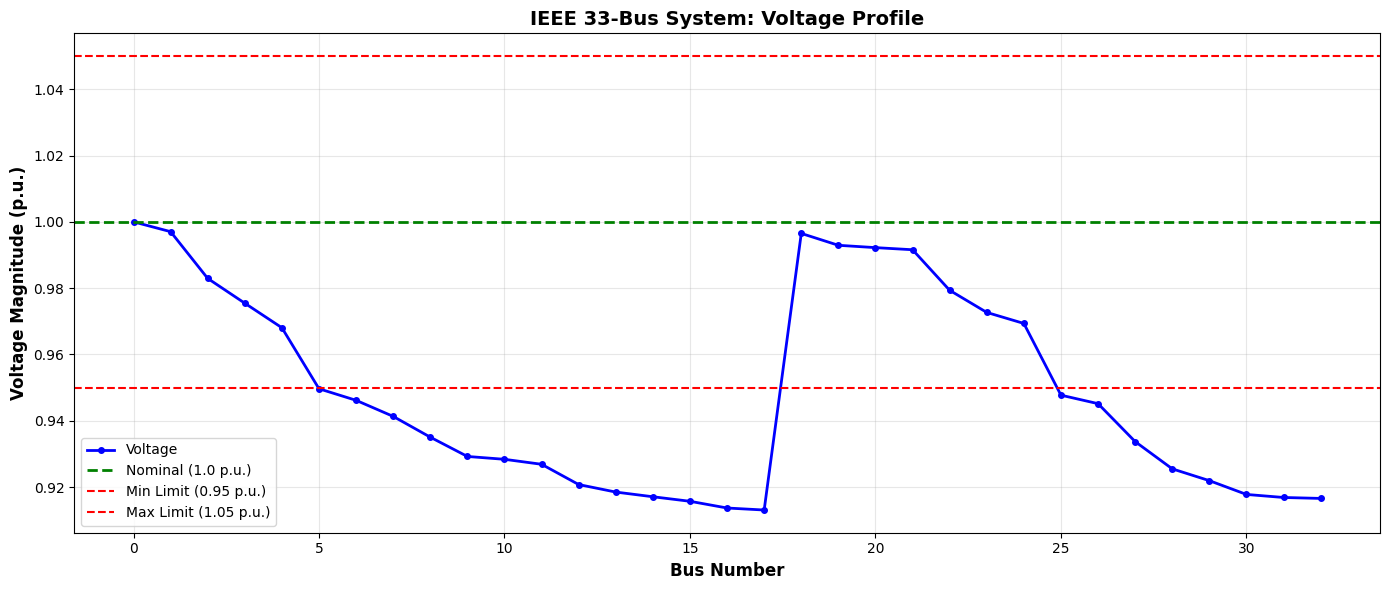


⚠️  Voltage Violations: 21 buses


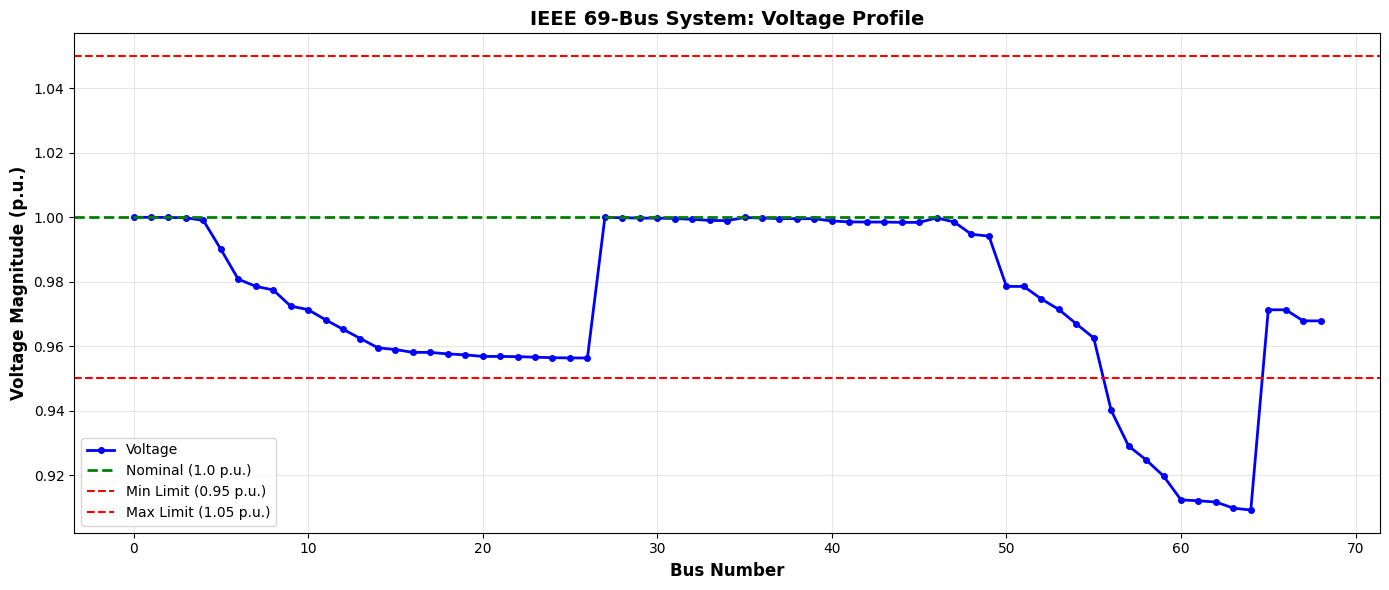


⚠️  Voltage Violations: 9 buses


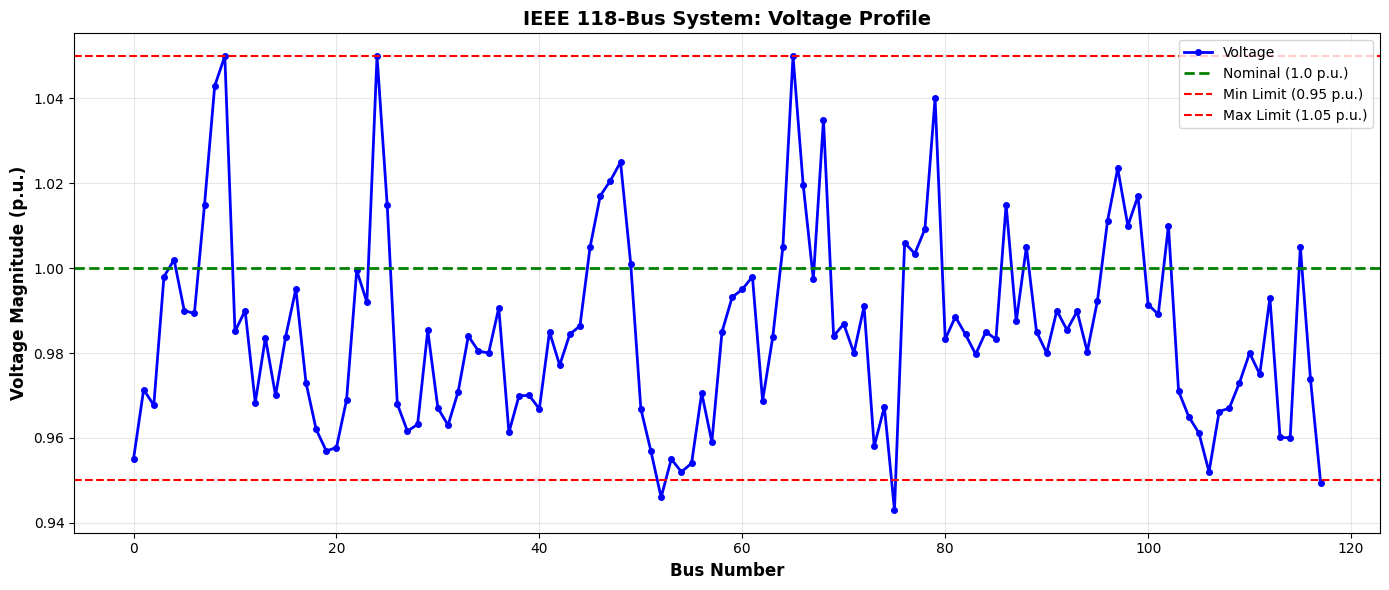


⚠️  Voltage Violations: 3 buses


In [24]:
def plot_voltage_profile(net, name="System"):
    """Plot voltage profile"""
    fig, ax = plt.subplots(figsize=(14, 6))
    
    bus_indices = net.bus.index
    voltages = net.res_bus.vm_pu.values
    
    ax.plot(bus_indices, voltages, 'b-o', linewidth=2, markersize=4, label='Voltage')
    ax.axhline(y=1.0, color='g', linestyle='--', linewidth=2, label='Nominal (1.0 p.u.)')
    ax.axhline(y=0.95, color='r', linestyle='--', linewidth=1.5, label='Min Limit (0.95 p.u.)')
    ax.axhline(y=1.05, color='r', linestyle='--', linewidth=1.5, label='Max Limit (1.05 p.u.)')
    
    ax.set_xlabel('Bus Number', fontsize=12, fontweight='bold')
    ax.set_ylabel('Voltage Magnitude (p.u.)', fontsize=12, fontweight='bold')
    ax.set_title(f'{name}: Voltage Profile', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Check violations
    violations = net.res_bus[(net.res_bus.vm_pu < 0.95) | (net.res_bus.vm_pu > 1.05)]
    if len(violations) > 0:
        print(f"\n⚠️  Voltage Violations: {len(violations)} buses")
    else:
        print(f"\n✓ No voltage violations")


# Plot voltage profiles
plot_voltage_profile(net_33, "IEEE 33-Bus System")

if net_69 is not None:
    plot_voltage_profile(net_69, "IEEE 69-Bus System")

plot_voltage_profile(net_118, "IEEE 118-Bus System")

Export Results to Excel

In [26]:
def export_results_to_excel(net, filename, name="System"):
    """Export all results to Excel"""
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        # Bus results
        bus_results = pd.DataFrame({
            'Bus': net.bus.index,
            'V (p.u.)': net.res_bus.vm_pu,
            'Angle (deg)': net.res_bus.va_degree,
            'P (MW)': net.res_bus.p_mw,
            'Q (MVAr)': net.res_bus.q_mvar
        })
        bus_results.to_excel(writer, sheet_name='Bus Voltages', index=False)
        
        # Line results
        line_results = pd.DataFrame({
            'From Bus': net.line.from_bus,
            'To Bus': net.line.to_bus,
            'P (MW)': net.res_line.p_from_mw,
            'Q (MVAr)': net.res_line.q_from_mvar,
            'Loading (%)': net.res_line.loading_percent,
            'P Loss (MW)': net.res_line.pl_mw,
            'Q Loss (MVAr)': net.res_line.ql_mvar
        })
        line_results.to_excel(writer, sheet_name='Line Flows', index=False)
        
        # Summary
        summary = pd.DataFrame({
            'Metric': ['Total P Generation (MW)', 'Total P Load (MW)', 
                      'Total P Loss (MW)', 'Loss Percentage (%)'],
            'Value': [
                net.res_gen.p_mw.sum(),
                net.res_load.p_mw.sum(),
                net.res_line.pl_mw.sum(),
                (net.res_line.pl_mw.sum() / net.res_load.p_mw.sum() * 100)
            ]
        })
        summary.to_excel(writer, sheet_name='Summary', index=False)
    
    print(f"✓ Results exported to: {filename}")


# Export results
export_results_to_excel(net_33, 'ieee33_results.xlsx', 'IEEE 33-Bus')

if net_69 is not None:
    export_results_to_excel(net_69, 'ieee69_results.xlsx', 'IEEE 69-Bus')

export_results_to_excel(net_118, 'ieee118_results.xlsx', 'IEEE 118-Bus')


✓ Results exported to: ieee33_results.xlsx
✓ Results exported to: ieee69_results.xlsx
✓ Results exported to: ieee118_results.xlsx


Summary Statistics

In [27]:
def print_summary_statistics(net, name="System"):
    """Print comprehensive summary"""
    print(f"\n{'='*70}")
    print(f"SUMMARY STATISTICS: {name}")
    print('='*70)
    
    print(f"\nSystem Configuration:")
    print(f"  Number of Buses: {len(net.bus)}")
    print(f"  Number of Lines: {len(net.line)}")
    print(f"  Number of Generators: {len(net.gen) if 'gen' in net else 0}")
    print(f"  Number of Loads: {len(net.load)}")
    
    print(f"\nVoltage Statistics:")
    print(f"  Min Voltage: {net.res_bus.vm_pu.min():.4f} p.u.")
    print(f"  Max Voltage: {net.res_bus.vm_pu.max():.4f} p.u.")
    print(f"  Mean Voltage: {net.res_bus.vm_pu.mean():.4f} p.u.")
    
    print(f"\nPower Balance:")
    total_gen = net.res_gen.p_mw.sum() if 'gen' in net else 0
    total_load = net.res_load.p_mw.sum()
    total_loss = net.res_line.pl_mw.sum()
    
    print(f"  Total Generation: {total_gen:.4f} MW")
    print(f"  Total Load: {total_load:.4f} MW")
    print(f"  Total Losses: {total_loss:.4f} MW")
    print(f"  Loss Percentage: {(total_loss/total_load*100):.4f}%")
    
    print(f"\nLine Loading:")
    print(f"  Max Loading: {net.res_line.loading_percent.max():.2f}%")
    print(f"  Mean Loading: {net.res_line.loading_percent.mean():.2f}%")
    
    # Overloaded lines
    overloaded = net.res_line[net.res_line.loading_percent > 100]
    if len(overloaded) > 0:
        print(f"  ⚠️  Overloaded Lines: {len(overloaded)}")
    else:
        print(f"  ✓ No overloaded lines")


# Print summaries
print_summary_statistics(net_33, "IEEE 33-Bus System")

if net_69 is not None:
    print_summary_statistics(net_69, "IEEE 69-Bus System")

print_summary_statistics(net_118, "IEEE 118-Bus System")


SUMMARY STATISTICS: IEEE 33-Bus System

System Configuration:
  Number of Buses: 33
  Number of Lines: 37
  Number of Generators: 0
  Number of Loads: 32

Voltage Statistics:
  Min Voltage: 0.9131 p.u.
  Max Voltage: 1.0000 p.u.
  Mean Voltage: 0.9485 p.u.

Power Balance:
  Total Generation: 0.0000 MW
  Total Load: 3.7150 MW
  Total Losses: 0.2027 MW
  Loss Percentage: 5.4556%

Line Loading:
  Max Loading: 0.00%
  Mean Loading: 0.00%
  ✓ No overloaded lines

SUMMARY STATISTICS: IEEE 69-Bus System

System Configuration:
  Number of Buses: 69
  Number of Lines: 68
  Number of Generators: 0
  Number of Loads: 48

Voltage Statistics:
  Min Voltage: 0.9092 p.u.
  Max Voltage: 1.0000 p.u.
  Mean Voltage: 0.9734 p.u.

Power Balance:
  Total Generation: 0.0000 MW
  Total Load: 3.8019 MW
  Total Losses: 0.2250 MW
  Loss Percentage: 5.9171%

Line Loading:
  Max Loading: 22.36%
  Mean Loading: 4.33%
  ✓ No overloaded lines

SUMMARY STATISTICS: IEEE 118-Bus System

System Configuration:
  Number 